## <font color='#0000FF'>MSC_DA_CA2 - INTEGRATEDCA2<font color='#1ABC9D'>
### <font color='#'>**Advanced Data Analytics  & Big Data Storage and Processing**
### <font color='#1ABC9C'>**Lecturer(s): David McQuaid and Muhammad Iqbal**
------
<font color='#1ABC9C'>**Student name / ID** // Rosilene Francisca da Silva - 2021090

## Big Data Storage and Processing  & Advanced Data Analytics

	Exploratory Data Analysis (EDA):

	Conduct EDA to understand trends, patterns, and anomalies in the dataset

   Data Preparation

### Sentiment Analysis
	TextBlob vs VADER

	Apply these techniques to extract sentiment from tweets: Compare the results.

### Time Series Forecasting
	Implement two forecasting methods: a neural network (LSTM) and ARIMA Model.

	Forecast sentiment trends for 1 day, 3 days, and 7 days forward. 

### Data Visualistion - Dashboard 
	Create a dynamic and interactive dashboard to visualize the results and forecasts.

	Integrate Tufts principles into the dashboard design and justify their application.

This continuous assessment was required to identify and carry out an analysis of a large dataset gathered from the Twitter API “ProjectTweets.csv”:

The dataset is guaranteed to have an organised schema, dependable transactional integrity, strong query capabilities, and simple integration with Apache Spark by selecting MySQL over a NoSQL database. These advantages combine to make MySQL suitable for populating the information and further analytical processing.

The dataset is guaranteed to have an organised schema, dependable transactional integrity, strong query capabilities, and simple integration with Apache Spark by selecting MySQL over a NoSQL database. These advantages combine to make MySQL the superior option for populating the information and doing further analytical processing.

"The dataset used in this analysis, ProjectTweets.csv, was provided by Professor [McQuaid] via the Moodle [https://moodle.cct.ie/mod/assign/view.php?id=44089]course [MSc in Data Analytics] CCT College Dublin on 18 April 2024."

### Transitioning to Pandas for Continuous Analysis in a New Jupyter Notebook (Integrated_CA2MScDA_ BD_ADA_V2)

#### Rationale:

The decision to proceed with data analysis in Python using Pandas on the Windows platform was influenced by several factors. Primarily, challenges with integrating TensorFlow on the Linux virtual machine (VM) prompted a switch, compounded by the VM's restrictive memory limitations. Furthermore, pandas provide a more extensive and detailed library for data manipulation than PySpark, especially considering the breadth and depth of functionality available directly out of the box. Pandas' comprehensive functionality greatly expands its data processing capabilities on the Windows platform.

In [270]:
#!pip install plotly kaleido

# Python with Pandas

The dataset `ProjectTweets.csv` was initially stored in HDFS on a Linux Virtual Machine, so it was populated into a MySQL database utilizing as PySpark and subsequently preprocessed as `twitter_data` dataset. Following this preprocessing, the dataset was converted from MySQL to a Pandas DataFrame and saved as a`twitter_df` CSV file. This allowed for the continuation of data analysis on a Windows platform utilizing the Pandas library in Python.

In [20]:
# Importing the libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import cm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Command to display all columns in the file.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Importing the CSV Dataset 
twitter_df = pd.read_csv('twitter_df.csv') 

# Print the first 5 rows
twitter_df.head(5)

,user_id,date,user_handle,tweet_text
0,1467810672,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...
1,1467810917,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...
2,1467811184,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire
3,1467811193,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all...."
4,1467811372,2009-04-06 22:20:00,joy_wolf,@Kwesidei not the whole crew


In [21]:
# Print the last 5 rows
twitter_df.tail(5)

,user_id,date,user_handle,tweet_text
1599994,2193601966,2009-06-16 08:40:49,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,2193601969,2009-06-16 08:40:49,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,2193601991,2009-06-16 08:40:49,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,2193602064,2009-06-16 08:40:49,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,2193602129,2009-06-16 08:40:50,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


With this prior analysis, it revealed that the dataset containing tweets and can be considered sequential data, especially considering temporal aspects such as the date and time each tweet was posted. Sequential data refers to data in which the order of entries is important and each data point is related to its predecessors and successors within a given timeline. 

### Data Exploration (EDA) & Data Preparation

In [22]:
# Drop columns 'user_id'
twitter_df.drop(['user_id'], axis=1, inplace=True)
twitter_df.head(2)

,date,user_handle,tweet_text
0,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...
1,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...


In [23]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   date         1599999 non-null  object
 1   user_handle  1599999 non-null  object
 2   tweet_text   1599999 non-null  object
dtypes: object(3)
memory usage: 36.6+ MB


In [24]:
print('length of data is', len(twitter_df))

length of data is 1599999


Based on the first basic details, the dataset is a collection of tweets, commonly can be use in sentiment analysis or other natural language processing tasks. 

Dataset Size and Integrity:
The dataset contains approximately 1.6 million entries (1599999 entries, indexed from 0 to 1599998) and 3 columns.
Each column has the same number of non-null entries (1599999), indicating there are no missing values in any of the columns.
Memory Usage: The dataframe is consuming approximately 36.6+ MB of memory, which is relevant for understanding the computation resources needed to process this dataset.

#### DateTime Parsing - Convert `date` format
The `date` column contains date and time information as a object, let's to convert it into a DateTime for easier manipulation and to facilitate time series operations.

Given the `date` format is (2009-04-06 22:19:49), to guarantee reliable and precise parsing of the date column in the dataset, error handling was incorporated into the datetime format code. Pandas can directly interpret each part of the datetime strings by defining the format (%Y-%m-%d %H:%M:%S), which prevents misunderstandings and improves parsing efficiency. The function can handle values that don't fit the required format by converting them to NaT when errors='coerce' is used. This preserves processing continuity and makes it simple to identify problems with the quality of the data. This technique is particularly helpful when getting your data ready for accurate and trustworthy time-series analysis.

In [25]:
# Convert the 'date' column to datetime specifying the exact format
twitter_df['date'] = pd.to_datetime(twitter_df['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Check the first few entries to confirm the change
print(twitter_df['date'].head(2))

0   2009-04-06 22:19:49
1   2009-04-06 22:19:53
Name: date, dtype: datetime64[ns]


In [26]:
twitter_df.isnull().values.any()

False

#### Display the Unique Values

In [27]:
for column in twitter_df.columns:
    num_unique_values = twitter_df[column].nunique()
    print(f"Number of unique values in '{column}': {num_unique_values}")

Number of unique values in 'date': 774362
Number of unique values in 'user_handle': 659775
Number of unique values in 'tweet_text': 1581465


In [28]:
def return_unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

unidf = return_unique_values(twitter_df)
print(unidf)

      Features  Uniques
0         date   774362
1  user_handle   659775
2   tweet_text  1581465


#### Summary statistics of numerical variable

In [29]:
twitter_df.describe()

,date
count,1599999
mean,2009-05-31 07:26:27.994492416
min,2009-04-06 22:19:49
25%,2009-05-28 23:01:17.500000
50%,2009-06-02 03:08:55
75%,2009-06-15 05:21:43.500000
max,2009-06-25 10:28:31


According to the dataset's summary statistics, the 'date' column contains 1,599,999 records total and covers the period from April 6, 2009, to June 25, 2009. The dataset's mean date is May 31, 2009, at around 07:26 AM, indicating that most dates have a central tendency towards the end of May. According to the quartiles, 25% of the data is before late May, 50% (the median) is just after the beginning of June, and 75% is from before mid-June. The data point concentration in late May and early June is highlighted by these statistics, suggesting that the dataset may be especially rich in events or activities during this time. This information may be useful for time series analysis or event-driven studies that concentrate on these dates.

In [30]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   date         1599999 non-null  datetime64[ns]
 1   user_handle  1599999 non-null  object        
 2   tweet_text   1599999 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 36.6+ MB


### Distributions

In [31]:
import plotly.graph_objects as go
from plotly.offline import plot

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)  # This loads the latest version of Plotly's library

#!pip install plotly

Due to the Plotly plots disappearing in a Jupyter Notebook after a few minutes, this method of generating static images of the plots was applied  to ensure that Plotly graphs remain visible in Jupyter Notebooks:

#### Histogram of Distribution of Tweets Over Time
This histogram highlighting any significant increases or decreases in activity that may correspond to specific events or patterns in user behaviour.

In [ ]:
import plotly.express as px
import pandas as pd

fig = px.histogram(twitter_df, x='date', title='Distribution of Tweets Over Time', nbins=50,
                   labels={'date': 'Date'}, template='plotly_white')
fig.update_layout(xaxis_title='Date', yaxis_title='Count of Tweets',
                  bargap=0.2, xaxis={'tickformat': '%Y-%m-%d'})
fig.show()

The histogram shows there is a significant spike in tweet volume around the end of May to the beginning of June, reaching almost 200,000 tweets. 
The general trend appears to be somewhat cyclical, with intervals of increased activity followed by quieter periods. The tweet distribution during the observed period seems to be multimodal, with multiple distinct peaks that indicate bursts of activity associated with particular events or reoccurring patterns. This pattern suggests that Twitter usage isn't steady but varies a lot, maybe because of weekly routines or seasonal events that draw users in at different times. A right-skewed distribution, where the majority of activity clusters at lower levels with intermittent surges, is implied by the variation in tweet volume, which exhibits sharp spikes followed by quieter intervals.  

#### Box Plot of 'date' column
Create a box plot for the 'date' column to observe the spread and central tendency.
This box plot will give a visual understanding of the distribution of tweet dates by displaying the median date, the interquartile range, and any possible outliers in your data. It can assist in locating any anomalies or peculiar patterns in the dataset and is especially helpful in comprehending how the dates are distributed throughout the observed period.

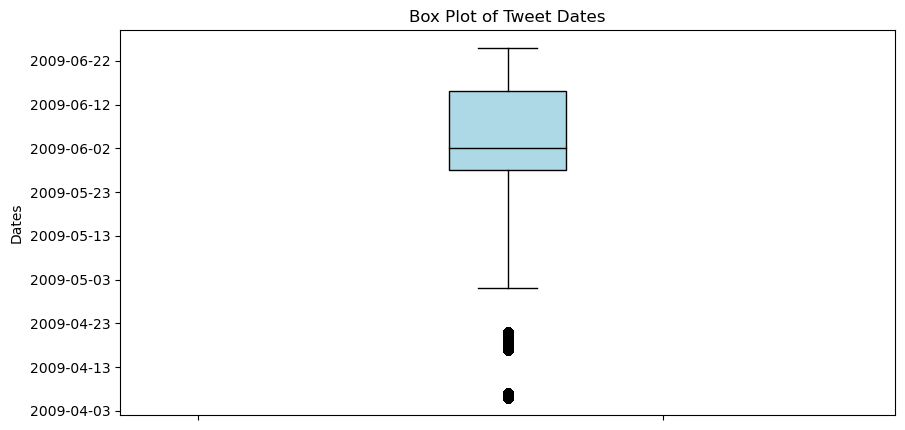

In [197]:
plt.figure(figsize=(10, 5)) 

# Convert dates to ordinal for plotting
box = plt.boxplot(twitter_df['date'].map(pd.Timestamp.toordinal),
                  patch_artist=True, 
                  boxprops=dict(facecolor='lightblue', color='black'),  
                  whiskerprops=dict(color='black'), 
                  capprops=dict(color='black'), 
                  medianprops=dict(color='black'),
                  flierprops=dict(marker='o', markerfacecolor='black', markeredgecolor='black'))  

# Limit x-axis to one tick
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(1))

# Convert ordinal numbers back to dates on the y-axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: pd.Timestamp.fromordinal(int(x)).strftime('%Y-%m-%d')))
plt.title('Box Plot of Tweet Dates')
plt.ylabel('Dates')
plt.grid(False)
plt.show()

The box plot visualises the distribution of tweet dates over a given time period—from early April to late June 2009. The interquartile range (IQR), which makes up most of the box, shows that the median date falls between early May and early June. Specifically, it falls around late May. This indicates a potentially noteworthy period of interest or event, as half of the tweeting activity appears to have happened in less than a month.

The whiskers extend from early April to late June, covering the range of typical tweet dates and displaying several outliers below the lower whisker, dating back to early April. These outliers indicate that some tweet activities occurred significantly earlier than the rest of the data. Such insights could point to specific events or the beginning of a trend that triggered these early tweets. This analysis is useful for identifying periods of increased or unusual activity, as well as understanding temporal patterns in Twitter usage during this time frame.

In [258]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   date         1599999 non-null  datetime64[ns]
 1   user_handle  1599999 non-null  object        
 2   tweet_text   1599999 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 36.6+ MB


### Trends in Tweet Activity: Weekly and Monthly Analysis

#### Finding the minimum and maximum date, these will display the earliest and latest dates in the dataset.

In [259]:
# Calculate 'min_date' and 'max_date'
min_date = twitter_df['date'].min()
max_date = twitter_df['date'].max()

# Printing the earliest and latest dates
print(f"First tweet date: {min_date}")
print(f"Last tweet date: {max_date}")

First tweet date: 2009-04-06 22:19:49
Last tweet date: 2009-06-25 10:28:31


The chosen code segment efficiently identifies and displays the time boundaries of a date-based dataset. Calculating the earliest and latest dates from dataset's 'date' column provides critical insights into the data's temporal span without requiring manual inspection. This automatic detection of date ranges is critical for accurate and informed data analysis, particularly when the dataset's timeframe is unknown. It allows for better decision-making and analysis based on the actual data available.

#### Print Unique Months 
Print the unique months present the dataset to confirm the range of data and ensures that all expected months are present in the dataset before proceed with further analysis or visualization. Let's print directly unique year-month combinations without modify the DataFrame by adding a new column.

In [260]:
# Print unique year and month combinations 
unique_months_direct = twitter_df['date'].dt.to_period('M').unique()
print(unique_months_direct)

<PeriodArray>
['2009-04', '2009-05', '2009-06']
Length: 3, dtype: period[M]


#### Identifying if the dataset has any gaps in the dates
To identify gaps in a dataset, by calculate the number of days between consecutive dates and display those that exceed one day. 

Even though the records contain no null values, this null value check ignores gaps in temporal data where no records were created or recorded. Such gaps are not caused by missing data within existing records but by missing records themselves, which may occur on a daily, weekly, or monthly basis, depending on the nature of the data being collected. It is still relevant and helpful to look for gaps between dates.

In [261]:
# Copy the date column to a new DataFrame for processing
time_df = pd.DataFrame(twitter_df['date'].copy())

# Sort the dates to ensure chronological order
time_df.sort_values('date', inplace=True)

# Calculate the differences between consecutive dates
time_df['date_diff'] = time_df['date'].diff()

# Optional: Convert differences to a more readable format, e.g., days
time_df['date_diff'] = time_df['date_diff'].dt.days

# Identify gaps, assuming a gap is any period longer than 1 day
gaps = time_df[time_df['date_diff'] > 1]

# Print the rows where gaps occur
print(gaps)

                      date  date_diff
8574   2009-04-17 20:30:31       10.0
41606  2009-05-01 20:08:46       10.0
77475  2009-05-09 18:08:48        5.0
104023 2009-05-16 19:17:07        2.0
135508 2009-05-21 23:29:41        3.0
460800 2009-06-14 14:31:20        6.0


Rationale: To create a temporary DataFrame temp_df, copy the 'date' column from the main DataFrame twitter_df. This step ensures that the original dataset remains constant throughout the process. The dates are then sorted chronologically to calculate the time differences between them accurately. The diff() method was used to compute these differences, representing the number of days between each record. Filtering for Gaps to identify date differences that exceed one day (temp_df['date_diff'] > 1), indicating a gap. 

The output DataFrame gaps contain rows with significant gaps between the dates of recorded tweets. Each row displays the date of a tweet and the number of days since the previous tweet.

- April 17, 2009: There was a 10-day gap since the previous tweet recorded in the dataset.
- May 1, 2009: Another 10-day gap occurred.
- May 9, 2009: This record follows a 5-day gap.
- May 16, 2009: There’s a 2-day gap here.
- May 21, 2009: This date comes after a 3-day break.
- June 14, 2009: A 6-day gap is noted here.

These gaps may indicate periods of inactivity that may be interesting for further analysis, revealing tweeting patterns or potential data collection issues. Such analysis is helpful in temporal data studies where data consistency and frequency are critical to understanding trends or behaviours.

#### Verifying April Data
Let's verify the presence and magnitude of April data in the DataFrame by specifically checking the entries for April or the earliest data points.

In [262]:
# Check the earliest dates in the DataFrame
print(twitter_df['date'].min())

# Check the number of tweets in the last few days of April if applicable
april_tweets = twitter_df[(twitter_df['date'] >= '2009-04-01') & (twitter_df['date'] <= '2009-04-30')]

# Give the number of tweets in April
print(april_tweets.shape) 

2009-04-06 22:19:49
(100024, 3)


From April 6th to the end of the month, 100,024 tweets were recorded across three columns, according to the output, which gives an overview of Twitter activity during that time frame. 

#### Plotting weekly and  monthly data - pyplot

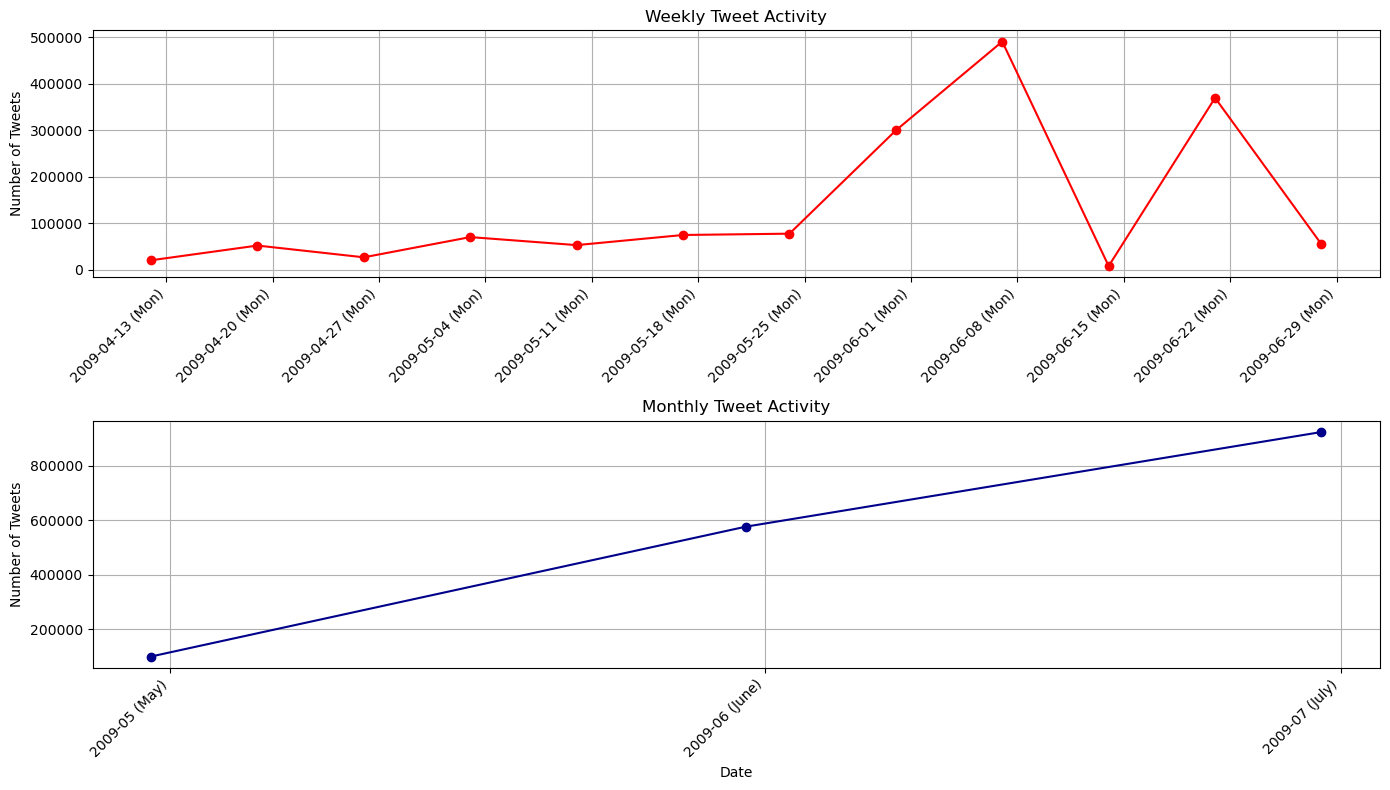

In [263]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Make a copy of the DataFrame for plotting 
trends_df = twitter_df.copy()
trends_df.set_index('date', inplace=True)  # Temporarily set the date as the index for resampling

# Resample the data by week and month 
weekly_tweets = trends_df.resample('W').size()
monthly_tweets = trends_df.resample('M').size()

# Creating the figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 8))

# Plotting weekly data
axs[0].plot(weekly_tweets.index, weekly_tweets, marker='o', linestyle='-', color='red')
axs[0].set_title('Weekly Tweet Activity')
axs[0].set_ylabel('Number of Tweets')
axs[0].xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d (%a)'))
axs[0].grid(True)

# Plotting monthly data
axs[1].plot(monthly_tweets.index, monthly_tweets, marker='o', linestyle='-', color='darkblue')
axs[1].set_title('Monthly Tweet Activity')
axs[1].set_ylabel('Number of Tweets')
axs[1].set_xlabel('Date')
axs[1].xaxis.set_major_locator(mdates.MonthLocator())
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m (%B)'))
axs[1].grid(True)

for ax in axs:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')
plt.tight_layout()
plt.show()

The plots display weekly and monthly Twitter activity data. The weekly plot displays the volume of tweets, with three notable peaks indicating times of high activity or occasions that might have contributed to a spike in Twitter usage. Interestingly, each peak is followed by a steep decline, suggesting that these bursts of high activity were transient. A growing engagement over these weeks is implied by the general trend, which tends to increase towards the later dates. The monthly plot, on the other hand, shows a consistent rise in tweet volume, with a noticeable upward trend from May to end of June. This implies that, despite weekly variations, there was an increase in Twitter's overall monthly activity during these months, maybe as a result of the platform's expanding user base or more interesting content. 

#### Plotly Monthly and Weekly Data to Start and End of the Month

##### Adjusting the Monthly Data to Start of the Month
The line monthly_tweets['date'] = monthly_tweets['date'] adjusts monthly dates. - offsets.pd.MonthEnd(1) plus offsets for pd.Day 1 changes the monthly date so that it is now the first day of the month instead of the last. To make this adjustment, take one month-end offset and subtract it to move the date back to the beginning of the month. Then add one day.
Plotly graph with distinct labels for each time period, displaying both weekly and adjusted monthly data.

In [264]:
trends_df = twitter_df.copy()

trends_df['date'] = pd.to_datetime(trends_df['date'])  
trends_df.set_index('date', inplace=True)  

# Resample the data by week and month
weekly_tweets = trends_df.resample('W').size().reset_index(name='counts')
monthly_tweets = trends_df.resample('M').size().reset_index(name='counts')
fig = go.Figure()

# Add weekly tweet activity trace
fig.add_trace(go.Scatter(x=weekly_tweets['date'], y=weekly_tweets['counts'],
                         mode='lines+markers', name='Weekly Tweets',
                         line=dict(color='red'), marker=dict(color='black')))

# Add monthly tweet activity trace
fig.add_trace(go.Scatter(x=monthly_tweets['date'], y=monthly_tweets['counts'],
                         mode='lines+markers', name='Monthly Tweets',
                         line=dict(color='darkblue'), marker=dict(color='black ')))
fig.update_layout(
    title='Tweet Activity: Weekly Trends and End of Monthly Trends',
   xaxis=dict(
        title='Date',
        tickmode='auto',
        tickformat='%Y-%m-%d',
        tickangle=-45),
    yaxis=dict(
        title='Number of Tweets'),
    legend=dict(
        y=1, x=1,
        bgcolor='rgba(255, 255, 255, 0.5)',
        bordercolor='rgba(0, 0, 0, 0.1)'),
    width=900,  
    height=450)
fig.show()

# Shift the monthly data points to the start of each month
monthly_tweets['date'] = monthly_tweets['date'] - pd.offsets.MonthEnd(1) + pd.offsets.Day(1)
fig = go.Figure()

fig.add_trace(go.Scatter(x=weekly_tweets['date'], y=weekly_tweets['counts'],
                         mode='lines+markers', name='Weekly Tweets',
                         line=dict(color='red'), marker=dict(color='black')))
fig.add_trace(go.Scatter(x=monthly_tweets['date'], y=monthly_tweets['counts'],
                         mode='lines+markers', name='Monthly Tweets',
                         line=dict(color='darkblue'), marker=dict(color='black')))
fig.update_layout(
    title='Tweet Activity: Weekly Trends and Beginning of Monthly Trends',
    xaxis=dict(
        title='Date',
        tickmode='auto',
        tickformat='%Y-%m-%d',
        tickangle=-45),
    yaxis=dict(
        title='Number of Tweets'),
    legend=dict(
        y=1, x=1,
        bgcolor='rgba(255, 255, 255, 0.5)',
        bordercolor='rgba(0, 0, 0, 0.1)'),
    width=900, 
    height=450)
fig.show()

Results and Rationale:

The Plotly visualization appears to be anchored at the end of each month (like on 30/04/2009) and this is not displaying well in the context of analysis, let's adjust the data points to reflect the start of each month instead. This change can help in aligning the visualization more intuitively with the monthly progression, especially when viewed alongside weekly data that typically starts each week. When resample data by month in pandas, it by default assigns the result to the last day of the period. But it is possible to shift this to the first day by modifying the resample operation.

The blue line represents the plot of Twitter activity trends prior to the monthly tweet count. It indicates a continuous upward trend, signifying a rise in activity during the observed duration. This suggests that the platform's user base or engagement is expanding. The weekly tweet count, which is displayed in red, on the other hand, demonstrates greater volatility with notable swings, such as sharp peaks and troughs. This plot emphasises how crucial it is to consider both long-term patterns and transient variations in order to have a complete understanding of platform engagement.

The plots do not show gaps for days without tweets, depending on the type of data being collected. To accurately display gaps, the data must be handled in such a way that NaN values for missing data points during these periods are retained, resulting in breaks or gaps in the plotted lines that visually indicate days without tweet activity. Later on in the process of getting the dataset ready for a time series, it must be analyse.

Identifying gaps in time series data is critical for accurate forecasting because they distort the underlying patterns that forecasting models use to make predictions. Collection issues or system errors can cause missing data, and knowing where these gaps exist allows you to adjust models appropriately or choose appropriate data imputation methods. This ensures the data's integrity and continuity, critical for effective trend and seasonality analysis. Finally, addressing these gaps is critical for improving the reliability and accuracy of time series forecasts, enabling more informed decision-making based on the analysis.

#### To display the distribution of tweet activity by weekday using Plotly
Let's modify the approach slightly to fit Plotly's interactive graphing capabilities. 

In [265]:
import pandas as pd
import plotly.graph_objects as go

# Make a copy of the DataFrame for plotting
week_df = twitter_df.copy()
week_df['date'] = pd.to_datetime(week_df['date']) 
week_df.set_index('date', inplace=True) 

# Aggregate data by day and get the day of week for each date
daily_tweets = week_df.resample('D').size()
daily_tweets.index = daily_tweets.index.day_name()  # Convert index to weekday names

# Aggregate data by day and get the day of week for each date
daily_tweets = trends_df.resample('D').size()
daily_tweets.index = daily_tweets.index.day_name()  # Convert index to weekday names

# Group by weekday to get sum tweets per weekday
weekday_tweets = daily_tweets.groupby(daily_tweets.index).sum()

# Order the data by weekday starting from Monday
ordered_weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_tweets = weekday_tweets.reindex(ordered_weekdays)

# Create a Plotly figure
fig = go.Figure(go.Bar(
    x=weekday_tweets.index, 
    y=weekday_tweets,
    marker_color='cadetblue'))

# Update figure layout
fig.update_layout(
    title='Tweet Activity Distribution by Weekday',
    xaxis_title='Weekday',
    yaxis_title='Number of Tweets',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(len(ordered_weekdays))),
        ticktext=ordered_weekdays),
    template='plotly_white',
    width=900,  
    height= 500  )
fig.show()

The bar graph shows a clear pattern in Twitter usage across different days of the week:

Monday begins the week with moderate tweet activity, indicating that Twitter users are somewhat active as they return from the weekend.

Mid-Week Activity Decline: Tweet volumes have decreased significantly on Tuesday, Wednesday, and Thursday, indicating lower user engagement in the middle of the week. This could be due to users being more focused on work or other mid-week obligations, which results in less time spent on social media.

Significant Increase Towards the Weekend: Tweet activity rises significantly on Friday and continues through Saturday, peaking on Sunday. This increase suggests that Twitter users are more active over the weekend because they have more free time to engage with content, share their weekend plans or experiences, and interact with others.

Insights:

Peak Weekend Activity: The highest levels of Twitter activity occur on Sunday and Saturday, indicating that these are the most active days for users. This pattern suggests that weekends are ideal for publishing content that requires significant engagement, such as promotional posts, major announcements, or interactive content.

Strategic Content Timing: For marketers and content creators, scheduling posts between Friday and Sunday can increase visibility and engagement. Given the drop in activity from Tuesday to Thursday, these days may be better suited for less critical content or posts to establish a consistent presence without expecting high interaction rates.

Engagement Planning: Businesses and individuals should consider these trends when developing social media strategies. Engaging users when they are most active can increase interaction rates and content reach.

### Text Data Analysis
Analyzing the tweet texts, let's counting the number of words in each tweet.

Before calling, x (the tweet text) is explicitly converted to a string using `str(x).split()` is a helpful conversion because it guards against errors that could occur if non-string data were unintentionally included in the tweet_text. It guarantees that the.split() method, which splits the text into words based on spaces, always has a string to work on by first converting everything to a string.

#### Calculate the length of each tweet and the word count

In [266]:
# Calculate word count and add it as a new column
twitter_df['word_count'] = twitter_df['tweet_text'].apply(lambda x: len(str(x).split()))
twitter_df.head(5)

,date,user_handle,tweet_text,word_count
0,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...,21
1,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...,18
2,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire,10
3,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all....",21
4,2009-04-06 22:20:00,joy_wolf,@Kwesidei not the whole crew,5


The character count of each tweet and its total word count. An example of a moderately long tweet is the one by user "scotthamilton" in the first row, which has 111 characters and 21 words. The tweet from "joy_wolf" in the last row, on the other hand, is substantially shorter—just 29 characters and 5 words. These metrics are useful for examining tweet verbosity and content density. Applications such as sentiment analysis, user engagement research, and even social media language usage modelling can benefit from this kind of data.

### Histogram of Text Length and Word Count

Combined Histograms for Text Length and Word Count
Both measures are plotted in the same histogram and using different colours for distinction. This allows for direct comparison of distributions and gives a clear visual comparison of the data.

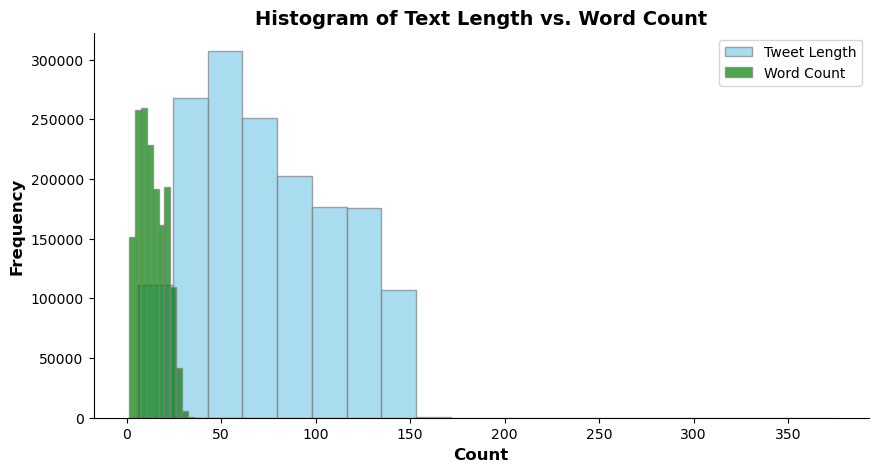

In [267]:
import pandas as pd
import matplotlib.pyplot as plt

twitter_df['tweet_length'] = twitter_df['tweet_text'].apply(len)  # Calculating tweet lengths.
twitter_df['word_count'] = twitter_df['tweet_text'].apply(lambda x: len(x.split()))  # Calculating word counts.

plt.figure(figsize=(10, 5))

# Plotting histograms on the same axes for comparison.
plt.hist(twitter_df['tweet_length'], bins=20, alpha=0.7, label='Tweet Length', color='skyblue', edgecolor='grey')
plt.hist(twitter_df['word_count'], bins=20, alpha=0.7, label='Word Count', color='green', edgecolor='grey')
plt.xlabel('Count', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Histogram of Text Length vs. Word Count', fontsize=14, fontweight='bold')
plt.legend()
ax = plt.gca()  # Get current axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display the plot
plt.show()

The histogram shows how these two measurements are directly compared. The blue text length represents a greater range of values, peaking at 50–100 characters, suggesting that most tweets are rather short. On the other hand, the word count, represented in green, exhibits a more concentrated range of word counts per tweet, primarily clustering around 10–20 words, with a narrower distribution and a sharper peak. This implies that although the length of a tweet can vary greatly, the average word count is generally higher. 

## Sentiment Analysis TextBlob vs VADER 

### Sentiment Analysis  - TextBlob 

In [209]:
# Set Up Python Environment
#!pip install textblob
#!pip install pandas emoji #Install pandas emoji for data manipulation and emoji to handle emojis specially.

#### Text Cleaning
For sentiment analysis, text needs to be cleaned for better results. 
Given the complexity and noise of tweet data, the best cleaning approach should strive for simplicity while remaining effective.

In [84]:
# Import libraries
from textblob import TextBlob
import pandas as pd
import re
import emoji
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure that necessary NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Set of English stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """Function to clean tweet text by removing links, special characters, numbers, emojis, etc."""
    # Convert text to lowercase and strip whitespace
    text = text.lower().strip()                          # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove mentions and hashtags
    text = re.sub(r'\@\w+|\#', '', text)                 # Convert emojis to text
    text = emoji.demojize(text)                          # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)                  # Remove numbers
    text = re.sub(r'\b\d+\b', '', text)                  # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Create a copy of the DataFrame 
new_twitter_df = twitter_df.copy()

# Apply the cleaning function to the tweet text
new_twitter_df['clean_tweet_text'] = new_twitter_df['tweet_text'].apply(clean_text)

# Display the first few rows of the cleaned DataFrame to verify 
new_twitter_df.head(2)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rosil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rosil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,date,user_handle,tweet_text,clean_tweet_text
0,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
1,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds


Rationale:
To improve the text quality for further analysis, like sentiment analysis or machine learning modelling, the code methodically preprocesses Twitter data. The script ensures that the remaining text is more consistent and meaningful by eliminating stopwords, converting text to a uniform lowercase format, and removing noise such as URLs, hashtags, mentions, emojis, and punctuation. This preprocessing may increase the precision and effectiveness of any subsequent analytical models by simplifying the data. The code is also easier to maintain and extend because of its well-organized structure, which clearly defines setup, function definitions, and data processing steps. This allows for future changes to the cleaning procedure or integration with other data processing workflows. The text is now prepared for further analysis.

#### TextBlob to get the polarity score to the DataFrame.
TextBlob is a Python library for natural language processing (NLP). It uses NLTK (Natural Language Toolkit). When given a sentence, it returns two results: polarity and subjectivity.

#### Create a new column called 'sentiment_label' that categorizes tweets as 'Positive', 'Negative', or 'Neutral' based on their polarity, 

In [85]:
# Function to determine the sentiment label based on polarity
def label_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Applying the function to determine sentiment label
new_twitter_df['sentiment_label'] = new_twitter_df['clean_tweet_text'].apply(label_sentiment)

# Verify the new 'sentiment_label' column
new_twitter_df.head(2)

,date,user_handle,tweet_text,clean_tweet_text,sentiment_label
0,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...,Neutral
1,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds,Positive


#### Create a new column called 'sentiment' that categorizes tweets as 'Positive', 'Negative', or 'Neutral' based on their polarity, 
Rationale: The `get_sentiment` function was applied over `label_sentiment` because of its direct return mechanism, which improves performance efficiency. This option is critical when processing large datasets because execution speed and memory usage are important considerations. Furthermore, the concise nature of 'get_sentiment' improves code readability and maintainability, which aligns with our team's standards for clean and efficient coding practices.

In [86]:
# Function to get the polarity score
def get_sentiment_polarity(text):
    # Create a TextBlob object and get the polarity
    return TextBlob(text).sentiment.polarity

# Apply the function to each row in the 'clean_tweet_text' column and store the result in a new 'sentiment' column
new_twitter_df['sentiment'] = new_twitter_df['clean_tweet_text'].apply(get_sentiment_polarity)

# Display to verify the new 'sentiment' column
new_twitter_df.head(1)

,date,user_handle,tweet_text,clean_tweet_text,sentiment_label,sentiment
0,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...,Neutral,0.0


In [147]:
# Display the columns 'clean_tweet_text' and 'sentiment_label' 
new_twitter_df[['clean_tweet_text','sentiment_label', 'sentiment']].head(5)

,clean_tweet_text,sentiment_label,sentiment
0,upset cant update facebook texting might cry r...,Neutral,0.000
1,dived many times ball managed save rest go bounds,Positive,0.500
2,whole body feels itchy like fire,Positive,0.200
3,behaving im mad cant see,Negative,-0.625
4,whole crew,Positive,0.200


Based on the results of the first five entries' `clean_tweet_text` and `sentiment` columns. Each tweet's emotional tone is indicated by its sentiment score, which ranges from -1 to 1. Values close to 0 indicate neutral sentiments, positive values indicate positive sentiments and negative values indicate negative sentiments. A sentiment of 0.500 ("dived many times ball managed to save rest go bounds"), for example, suggests a more optimistic view, whereas a sentiment of -0.625 ("behaving im mad can't see") expresses a clearly negative emotion. An understanding of users' feelings and opinions can be gained from this cleaned and analysed text.

The code effectively cleans and processes text for sentiment analysis, allowing for more accurate interpretation of emotional content in tweets. The findings show that TextBlob can distinguish between various emotional tones in tweets, ranging from strong negativity to positivity, based on lexical content, making it a useful tool for analysing sentiment in social media texts. This preprocessing and analysis pipeline serves as a solid foundation for future sentiment-based applications such as trend analysis, customer feedback, and long-term monitoring of public opinion.

#### Visualization of Sentiment Analysis Distribution - TextBlob
The plot counts the occurrences of each sentiment category in the DataFrame's'sentiment column and stores the results in the sentiment_counts variable. 

Rationale: The bar chart and printed sentiment counts are critical for quickly visualising and comprehending the distribution of emotions in a dataset, which is required for data-driven decisions. By clearly depicting the prevalence of negative, neutral, and positive sentiments, it quickly assesses public opinion, adjusts strategies as needed, and effectively communicates findings. This visualisation facilitates for further analysis.

In [268]:
import plotly.express as px
import pandas as pd


# Create a temporary series for binning sentiment scores for plotting
textblob_df = new_twitter_df['sentiment'].copy()


# Binning the sentiment scores for plotting
sentiment_categories = pd.cut(textblob_df, bins=[-1, -0.01, 0.01, 1], labels=['Negative', 'Neutral', 'Positive'])
sentiment_counts = sentiment_categories.value_counts()

# Sorting index to ensure the sentiments are plotted in logical order
sentiment_counts = sentiment_counts.reindex(['Negative', 'Neutral', 'Positive'])

# Create a bar chart using Plotly
fig = px.bar(x=sentiment_counts.index, y=sentiment_counts.values,
             labels={'x': 'Sentiment', 'y': 'Count'},
             title='Sentiment Analysis Distribution Using TextBlob',
             text=sentiment_counts.values,
             color=sentiment_counts.index,
             color_discrete_map={'Negative': '#D62728', 'Neutral': 'lightcyan', 'Positive': 'lightgreen'})

# Add customizations
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',
                  template='plotly_white',  # Apply white background template
                  width=900,  # Set figure width to 900 pixels
                  height=600)  # Set figure height to 500 pixels
fig.show()

# Print the number of counts for each sentiment, formatted
print("Sentiment Counts:")
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment} Sentiment: {count} occurrences")

Sentiment Counts:
Negative Sentiment: 314721 occurrences
Neutral Sentiment: 604780 occurrences
Positive Sentiment: 673754 occurrences


The bar chart illustrates the distribution of sentiment analysis results divided into three categories: negative, neutral, and positive. The y-axis represents the number of tweets in each category, while the x-axis categorises these counts by sentiment type.

Negative Sentiment: The red bar for negative sentiment indicates 314,721 occurrences. This list includes tweets analysed and classified as expressing negative emotions or opinions.

The neutral sentiment: is represented by a lightcyan bar with 604,780 occurrences. These tweets do not convey positive or negative emotions, implying a more factual, unemotional, or ambivalent tone.

Positive Sentiment: The positive sentiment, represented by a lightgreen bar, has the highest count, with 673,754 occurrences. This implies that a sizable proportion of the analysed tweets express positive emotions or opinions, indicating a generally favourable or approving tone.

#### Pie Chart of Tweets Sentiment - TextBlob
The'sentiment'].value_counts() is used to count the frequency of each unique sentiment value in the DataFrame. This method correctly handles summarization based on the 'sentiment' column.

In [94]:
import plotly.express as px

piechart_df = new_twitter_df.copy()

# Define sentiment bins and labels
bins = [-np.inf, -0.01, 0.01, np.inf] 
labels = ['Negative', 'Neutral', 'Positive']

# Bin the sentiment values
piechart_df['sentiment_category'] = pd.cut(piechart_df['sentiment'], bins=bins, labels=labels)

# Count occurrences of each sentiment category
sentiment_counts = piechart_df['sentiment_category'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment', 'count']

# Create a pie chart using Plotly Express
fig = px.pie(sentiment_counts, values='count', names='sentiment', title='Pie Chart of Tweets Sentiment TextBlob',
             color='sentiment',  
             color_discrete_map={'Negative': '#D62728', 'Neutral': 'lightcyan', 'Positive': '#2CA02C'}) 

fig.update_layout(showlegend=True)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

The pie chart shows the sentiment distribution of a dataset analysed with TextBlob, a popular Python library for processing textual data. Positive sentiment is the most prevalent in this visualisation, accounting for 42.1% of the tweets, indicating that the analysed text has an overall positive tone. Neutral sentiment follows closely at 37.8%, suggesting that a significant portion of tweets do not express evident positivity or negativity. Negative sentiment accounts for 20.1%, the least common of the three categories.
This distribution suggests that the discourse or content in the dataset tends to be more positive or neutral, with fewer negative expressions. 

## Sentiment Analysis - VADER  

Use VADER (Valence Aware Dictionary) for sentiment analysis. The VADER was chosen because it is well-suited for social media text analysis due to its sensitivity to both polarity and emotional intensity.

####  Import Libraries and Load VADER

First, install nltk library, which includes the VADER sentiment analysis tool. 

Why this step is necessary:
The VADER lexicon is an essential component of the SentimentIntensityAnalyzer. It contains a list of lexical features (for example, words) labelled as positive or negative based on their semantic orientation. The lexicon also contains intensity modifiers, which adjust sentiment scores based on the context in which a word appears.

In [296]:
#!pip install nltk scikit-learn
#!pip install nltk pandas

In [141]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import re

# Download the VADER lexicon 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rosil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

#### Clean text data for VADER  and Time Series Forecasting Analysis & Create an instance of sentiment analyzer and Define functions to analyze with label sentiment
For typical use with English-language social media text, it is not necessary to perform extensive cleaning before using VADER for this case. However, a minimal cleaning might still be beneficial.

Applying a text cleaning function appropriate for VADER sentiment analysis, specifically retaining VADER-relevant features while removing irrelevant elements such as URLs and Twitter handles. And also to perform time series forecasting, given the need to apply at least two methods, including neural networks and autoregressive models, the approach to text cleaning and subsequent feature extraction must be efficient and effective. 

In [142]:
# Create a copy of the DataFrame to work with
temp_df = twitter_df.copy()

# Define a function to clean the text
def clean_text(text):
    text = re.sub(r'@\w+', '', text)  # Remove mentions (usernames)
    text = re.sub(r'http\S+', '', text) # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove special characters and numbers
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra spaces
    return text

# Apply the cleaning function to your tweet text
temp_df['clean_tweet_text'] = temp_df['tweet_text'].apply(clean_text)

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Function to label the output based on the compound score
def label_output(compound):
    polarity = "neutral"
    if compound['compound'] >= 0.05:
        polarity = "positive"
    elif compound['compound'] <= -0.05:
        polarity = "negative"
    return polarity

# Function that analyzes the text and returns the compound sentiment
def sentiment(text):
    compound = analyzer.polarity_scores(text)
    return label_output(compound)

# Apply sentiment analysis to the 'cleaned tweet texts'
temp_df['sentiment'] = temp_df['clean_tweet_text'].apply(sentiment)

In [143]:
# Display the first 5 rows of the DataFrame to see the results
temp_df.head()

,date,user_handle,tweet_text,word_count,tweet_length,clean_tweet_text,sentiment
0,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...,21,111,is upset that he cant update his Facebook by t...,negative
1,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...,18,89,I dived many times for the ball Managed to sav...,positive
2,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire,10,47,my whole body feels itchy and like its on fire,negative
3,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all....",21,111,no its not behaving at all im mad why am i her...,negative
4,2009-04-06 22:20:00,joy_wolf,@Kwesidei not the whole crew,5,29,not the whole crew,neutral


The new column 'clean_tweet_text' shows a cleaned version of the tweet text, with mentions, URLs, and possibly special characters removed to standardise the text for analysis. And the new 'sentiment' column indicates the tweet's sentiment, classified as 'negative', 'positive', or 'neutral'. This is most likely the result of a sentiment analysis process determining the text's emotional tone.

#### Define a Function to calculate the VADER sentiment polarity (compound score) and Apply the sentiment function

In [148]:
import re

# Function to get compound sentiment score using VADER
def get_vader_sentiment(text):
    # VADER outputs a dictionary of scores; 'compound' gives the normalized sentiment score
    compound_score = analyzer.polarity_scores(text)['compound']
    return compound_score

# Calculate the compound sentiment scores for each cleaned tweet.
temp_df['vader_sentiment'] = temp_df['clean_tweet_text'].apply(get_vader_sentiment)

# Display the first few rows to check the sentiment scores results
print(temp_df[['clean_tweet_text', 'vader_sentiment']].head(5))

                                    clean_tweet_text  vader_sentiment
0  is upset that he cant update his Facebook by t...          -0.7269
1  I dived many times for the ball Managed to sav...           0.4939
2     my whole body feels itchy and like its on fire          -0.2500
3  no its not behaving at all im mad why am i her...          -0.6597
4                                 not the whole crew           0.0000


The output displays how VADER interprets each tweet's emotional tone, which results from applying sentiment analysis to a subset of cleaned tweet texts. The text is shown in the clean_tweet_text column, which makes it more suited for analysis by eliminating mentions, URLs, and special characters. The normalised compound scores from VADER, which range from -1 (most negative) to +1 (most positive), are displayed in the vader_sentiment column.

#### Visualization of Sentiment Analysis Distribution - VADER

In [101]:
import plotly.express as px
import pandas as pd

# Create a temporary series for binning sentiment scores for plotting
sent_df = temp_df['vader_sentiment'].copy()

# Binning the sentiment scores for plotting
sentiment_categories = pd.cut(sent_df, bins=[-1, -0.01, 0.01, 1], labels=['Negative', 'Neutral', 'Positive'])
sentiment_counts = sentiment_categories.value_counts()

# Sorting index to ensure the sentiments are plotted in logical order
sentiment_counts = sentiment_counts.reindex(['Negative', 'Neutral', 'Positive'])

# Create a bar chart using Plotly
fig = px.bar(x=sentiment_counts.index, y=sentiment_counts.values,
             labels={'x': 'Sentiment', 'y': 'Count'},
             title='Sentiment Analysis Distribution Using VADER',
             text=sentiment_counts.values,
             color=sentiment_counts.index,
             color_discrete_map={'Negative': '#D62728', 'Neutral': 'lightcyan', 'Positive': 'lightgreen'})

# Add customizations
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',
                  template='plotly_white',  
                  width=900,  
                  height=600)  
fig.show()

# Print the number of counts for each sentiment, formatted
print("Sentiment Counts:")
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment} Sentiment: {count} occurrences")

Sentiment Counts:
Negative Sentiment: 434441 occurrences
Neutral Sentiment: 413944 occurrences
Positive Sentiment: 751614 occurrences


The bar chart shows the sentiment analysis, divided into three types: negative, neutral, and positive. Positive sentiments are the most common, with approximately 751,614 occurrences, followed by negative sentiments at around 434,441 occurrences and neutral sentiments at 413,944. This distribution indicates that the dataset contains a significant amount of optimistic or favourable content, which slightly outnumbers negative and neutral content volumes. The clear separation in counts also suggests effective sentiment categorization, which provides helpful information about the overall emotional tone of the data being analysed. 

#### Pie Chart of Tweets VADER Sentiment

In [102]:
import plotly.express as px

piechart_df = temp_df.copy()

# Define sentiment bins and labels
bins = [-np.inf, -0.01, 0.01, np.inf] 
labels = ['Negative', 'Neutral', 'Positive']

# Bin the sentiment values
piechart_df['sentiment_category'] = pd.cut(piechart_df['vader_sentiment'], bins=bins, labels=labels)

# Count occurrences of each sentiment category
sentiment_counts = piechart_df['sentiment_category'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment', 'count']

# Create a pie chart using Plotly Express
fig = px.pie(sentiment_counts, values='count', names='sentiment', title='Pie Chart of Tweets - VADER Sentiment',
             color='sentiment',  
             color_discrete_map={'Negative': '#D62728', 'Neutral': 'lightcyan', 'Positive': '#2CA02C'}) 

fig.update_layout(showlegend=True)
fig.update_traces(textposition='inside', textinfo='percent+label')

# Show the plot
fig.show()

The pie chart shows a visual breakdown of sentiment categories from a dataset analysed with the VADER. Positive sentiments account for 47% of all tweets, indicating a predominance of positive expressions or content in the dataset. Negative sentiments comprise 27.2% of the dataset, followed by neutral sentiments at 25.9%. This distribution shows that more than half of the tweets have a positive or neutral tone, indicating that the overall sentiment in the analysed texts is more positive or neutral than negative. 

#### Word-Cloud for Positive and Negative tweets -  VADER

The word clouds show the frequency of words in positive and negative tweets, respectively. Each word cloud provides a visual summary of the sentiments expressed in the tweets, allowing you to quickly identify the most common themes and language used in each sentiment category. Word clouds enable viewers to quickly grasp the most important terms in a large corpus of text, making them a popular choice for displaying text data summaries. It require minimal explanation and can be understood by a broad audience, making it ideal for presentations or reports.

In [105]:
#!pip install pandas matplotlib wordcloud

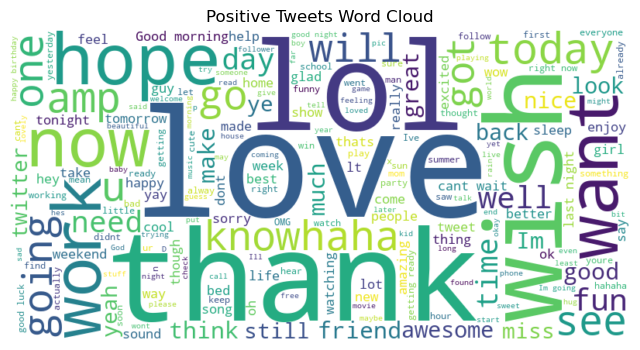

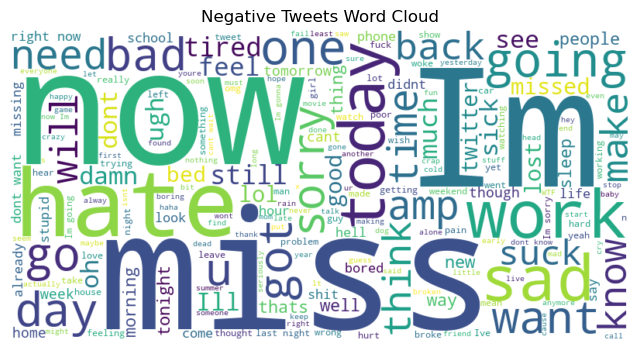

In [104]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Make a copy of the DataFrame 
plot_df = temp_df.copy()

# Function to plot word cloud
def plot_word_cloud(tweets, title):
    text = ' '.join(tweet for tweet in tweets)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Filter apositiv and negative e tweets
negative_tweets = plot_df[plot_df['vader_sentiment'] < 0]['clean_tweet_text']
positive_tweets = plot_df[plot_df['vader_sentiment'] > 0]['clean_tweet_text']

# Generate word clouds
plot_word_cloud(positive_tweets, 'Positive Tweets Word Cloud')
plot_word_cloud(negative_tweets, 'Negative Tweets Word Cloud')

The word clouds for positive and negative tweets visually represent the predominant sentiments expressed on Twitter. The positive word cloud is dominated by words like "love," "hope," "great," and "thank", indicating a cheerful and optimistic tone, with references to enjoyable and uplifting social interactions and personal emotions. In contrast, the negative word cloud includes words like "sad," "miss," "tired," and "bad," which express dissatisfaction, fatigue, and longing. These words are frequently associated with negative personal experiences, emotional struggles, or unpleasant social interactions. The juxtaposition of these clouds emphasises the stark differences in language and mood between positive and negative social media interactions, providing insights into how people express their emotions and the vocabulary associated with them.

## Time Series Analysis and Forecasting

### ARIMA & Neural Network: LSTM recurrent neural network 

Analysis of tweets involve:

- Trend analysis is the process sentiments over time: 

- Forecasting is the process of predicting future tweet volumes or sentiment trends using historical data.

#### Forecasting Steps
A brief overview of how approach the forecasting tasks:

Prepare Time-Series Data: Convert the DataFrame into a time-series format where the index is the date and the primary column sentiments, filling the date gaps, etc.

Model Fitting:

Neural Network: Fit a simple LSTM recurrent neural network to predict future sentiment based on past values.

ARIMA/SARIMA: Fit an ARIMA model, adjusting parameters based on the seasonality (if any), trend, and noise of the sentiment data.

Forecasting: Apply the fitted models to predict sentiment for the next 1, 3, and 7 days.

#### Drop unnecessary columns 
Non-essential columns such as `user_handle`, `tweet_text`, `word_count` and `tweet_length` are unnecessary for this time series forecasting. Droping and generate a new Dataframe.

In [149]:
temp_df.head(2)

,date,user_handle,tweet_text,word_count,tweet_length,clean_tweet_text,sentiment,vader_sentiment
0,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...,21,111,is upset that he cant update his Facebook by t...,negative,-0.7269
1,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...,18,89,I dived many times for the ball Managed to sav...,positive,0.4939


In [150]:
# Dropping columns and creating a new DataFrame
new_temp_df = temp_df.drop(['user_handle', 'tweet_text', 'word_count', 'tweet_length', 'vader_sentiment'], axis=1, inplace=False)

new_temp_df.head(2)

,date,clean_tweet_text,sentiment
0,2009-04-06 22:19:49,is upset that he cant update his Facebook by t...,negative
1,2009-04-06 22:19:53,I dived many times for the ball Managed to sav...,positive


In [151]:
new_temp_df.dtypes

date                datetime64[ns]
clean_tweet_text            object
sentiment                   object
dtype: object

In [152]:
new_temp_df.isnull().values.any()

False

In [153]:
new_temp_df.shape

(1599999, 3)

#### Grouping the data, counts each sentiment, and adds a column for the total sentiments per day

Rationale: This process groups the sentiment data by date, pivots the results to a more analysis-friendly format, and ensures that's can easily analyze the sentiment trends over time. The pivoted format is particularly useful for time series analysis, visualizations, and comparative studies across sentiment types.

#### Adjust Grouping and Pivoting to Account for NaN
When group and pivot the data, apply methods that keep NaN values if no data exists for a day

This command code processes a time series dataset by normalising the date to remove the time, creating a complete date range, and merging it with the original data to account for any missing dates. It replaces missing sentiment values with 'None', groups the data by date and sentiment while keeping NaN values, and then pivots the DataFrame so that each sentiment category becomes a column, ensuring all dates are represented with NaN for missing data points. This method provides data integrity and allows a thorough analysis of sentiment trends over time.

In [154]:
import pandas as pd
import numpy as np

new_temp_df['date'] = pd.to_datetime(new_temp_df['date']).dt.date  # Normalize date to remove time

# Create a complete date range
date_range = pd.date_range(start=new_temp_df['date'].min(), end=new_temp_df['date'].max()).date

# Ensure dates are in the DataFrame, setting counts to NaN for missing dates
dates_df = pd.DataFrame(date_range, columns=['date']).merge(new_temp_df, on='date', how='left')

# To fill the 'sentiment' column for the new rows with NaN or appropriate flags
dates_df['sentiment'] = dates_df['sentiment'].fillna('None')  # Example: using 'None' for no tweets

# Group by date and sentiment and count occurrences, keeping NaN values
day_sentiment_counts = dates_df.groupby(['date', 'sentiment'], dropna=False).size().reset_index(name='count')

# Pivot the data with 'negative', 'positive', 'neutral' as columns, keeping NaN for missing data
sentiment_day = day_sentiment_counts.pivot_table(index='date', columns='sentiment', values='count', fill_value=np.nan)

# Reset index to make 'date' a column
sentiment_day.reset_index(inplace=True)

# Display or further process your DataFrame
sentiment_day.head(5)

sentiment,date,None,negative,neutral,positive
0,2009-04-06,NaN,877.0,915.0,1567.0
1,2009-04-07,NaN,4187.0,4844.0,8280.0
2,2009-04-08,1.0,NaN,NaN,NaN
3,2009-04-09,1.0,NaN,NaN,NaN
4,2009-04-10,1.0,NaN,NaN,NaN


The result is a pivoted DataFrame with each row representing a date and each column representing a sentiment category ('None', 'negative', 'neutral', 'positive'), along with tweet counts for each sentiment. Missing data points are marked with NaN, indicating no data exists for that sentiment on those dates. This format makes it easy to identify tweet activity and gaps between dates.

Justification for applied these methods:
Handling missing dates, maintaining data integrity, accurate grouping and pivoting, consistent analysis and comprehensive time series analysis: This approach enables comprehensive analysis by accounting for every day within the range, allowing for accurate detection of trends and patterns in sentiment data over time.

#### Adding a 'Total' column
Adding a new column 'total' that represents the sum of the sentiments ('negative', 'neutral', and 'positive') for each row, giving an overall count of sentiments for each date.

In [155]:
# Calculate the total sentiment by summing the 'negative', 'neutral', and 'positive' columns, ensuring NaN is preserved where all inputs are NaN
sentiment_day['total'] = sentiment_day[['negative', 'neutral', 'positive']].sum(axis=1, min_count=1)
# Display to verify changes
sentiment_day.head(5)

sentiment,date,None,negative,neutral,positive,total
0,2009-04-06,NaN,877.0,915.0,1567.0,3359.0
1,2009-04-07,NaN,4187.0,4844.0,8280.0,17311.0
2,2009-04-08,1.0,NaN,NaN,NaN,NaN
3,2009-04-09,1.0,NaN,NaN,NaN,NaN
4,2009-04-10,1.0,NaN,NaN,NaN,NaN


In [156]:
sentiment_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      81 non-null     object 
 1   None      33 non-null     float64
 2   negative  48 non-null     float64
 3   neutral   48 non-null     float64
 4   positive  48 non-null     float64
 5   total     48 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.9+ KB


In [157]:
sentiment_day.shape

(81, 6)

In [158]:
# Convert the 'date' column to datetime format 
sentiment_day['date'] = pd.to_datetime(sentiment_day['date'])

In [159]:
sentiment_day.dtypes

sentiment
date        datetime64[ns]
None               float64
negative           float64
neutral            float64
positive           float64
total              float64
dtype: object

In [160]:
sentiment_day.isnull().values.any()

True

#### Visualizing Sentiment Over Time
Plotting the aggregated sentiment over time helps understand trends, patterns, and cycles in the sentiment data.

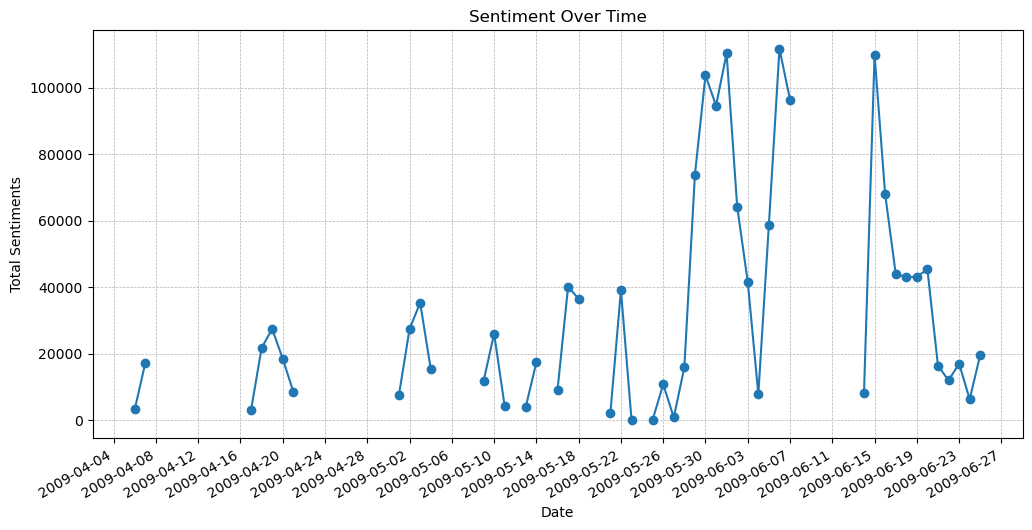

In [161]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(sentiment_day['date'], sentiment_day['total'], marker='o', linestyle='-')

# Set x-axis major ticks to each day and format date labels
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate date labels for better visibility
plt.gcf().autofmt_xdate()

plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sentiments')
plt.grid(False, which='both', linestyle='--', linewidth=0.5)
plt.show()

The plot shows the total sentiments by date from early April to late June 2009, revealing a series of fluctuations in sentiment volumes over time. Notably, the data shows several peaks, indicating days with exceptionally high sentiment activity that may be associated with specific events or notable occurrences on those dates. The graph also shows periods of lower activity, such as in the early days of the timeframe, and some sparse drops throughout. The sharp increases and decreases indicate that external factors or specific content drove significant engagement on certain days.  The next step should be dealing with these gaps over the date, before performing the time series.

#### Filling Missing Values
After it structured the DataFrame correctly with all dates and NaNs where data is missing, you can decide on a strategy to fill those NaN values, based on the requirement or analysis needs.

####  First,  set  the 'date' columnas the index and drop unnecessary columns

In [162]:
# Print current DataFrame columns and their index name
print("DataFrame columns and index name:")
print(sentiment_day.columns)
print("Columns Index Name:", sentiment_day.columns.name)

DataFrame columns and index name:
Index(['date', 'None', 'negative', 'neutral', 'positive', 'total'], dtype='object', name='sentiment')
Columns Index Name: sentiment


In [163]:
# Remove the name of the column index
sentiment_day.columns.name = None

# Set 'date' as the index of the DataFrame
if 'date' in sentiment_day.columns:  # Check if 'date' is a column
    sentiment_day.set_index('date', inplace=True)

# Drop the 'None' column if it exists
if 'None' in sentiment_day.columns:
    sentiment_day.drop('None', axis=1, inplace=True)
    
# Display changes for verification
print("\nAfter changes - DataFrame columns and index name:")
print(sentiment_day.columns)
print("DataFrame Index Name:", sentiment_day.index.name)
print("\nUpdated DataFrame:")
sentiment_day.head(5)


After changes - DataFrame columns and index name:
Index(['negative', 'neutral', 'positive', 'total'], dtype='object')
DataFrame Index Name: date

Updated DataFrame:


,negative,neutral,positive,total
date,,,,
2009-04-06,877.0,915.0,1567.0,3359.0
2009-04-07,4187.0,4844.0,8280.0,17311.0
2009-04-08,NaN,NaN,NaN,NaN
2009-04-09,NaN,NaN,NaN,NaN
2009-04-10,NaN,NaN,NaN,NaN


Rationale: Removing the Index Name: By setting sentiment_day.columns.name = None, it it's  remove the unwanted "sentiment" label from the columns index, simplifying the DataFrame’s structure.
Setting 'date' as the Index: Ensures that date-based operations such as time series analysis can be effectively performed.
Dropping 'None' Column: Cleans up the DataFrame by removing irrelevant or placeholder data.

In [164]:
sentiment_day.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81 entries, 2009-04-06 to 2009-06-25
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   negative  48 non-null     float64
 1   neutral   48 non-null     float64
 2   positive  48 non-null     float64
 3   total     48 non-null     float64
dtypes: float64(4)
memory usage: 3.2 KB


#### Linear Interpolation: 
Estimates missing values linearly between existing data points, which is effective for time series where it expect a gradual change between observations.
Backward and Forward Filling: These methods are used to handle any remaining NaNs at the beginning or the end of the dataset that interpolation might not cover.

In [165]:
import pandas as pd

# Apply linear interpolation to fill missing values
sentiment_day.interpolate(method='linear', inplace=True)

# If needed, fill remaining NaN values at the start or end of the DataFrame that cannot be interpolated
sentiment_day.fillna(method='bfill', inplace=True)  # Backfill
sentiment_day.fillna(method='ffill', inplace=True)  # Forward fill as a secondary option

# Display the DataFrame to check 
sentiment_day.head(10)

,negative,neutral,positive,total
date,,,,
2009-04-06,877.0,915.0,1567.0,3359.0
2009-04-07,4187.0,4844.0,8280.0,17311.0
2009-04-08,3837.4,4439.7,7611.2,15888.3
2009-04-09,3487.8,4035.4,6942.4,14465.6
2009-04-10,3138.2,3631.1,6273.6,13042.9
2009-04-11,2788.6,3226.8,5604.8,11620.2
2009-04-12,2439.0,2822.5,4936.0,10197.5
2009-04-13,2089.4,2418.2,4267.2,8774.8
2009-04-14,1739.8,2013.9,3598.4,7352.1


In [166]:
sentiment_day.isnull().values.any()

False

In [167]:
sentiment_day.shape

(81, 4)

The dataset's shape of (81, 4) is appropriate for daily grouped data collected from April 6 to June 25, 2009. Each row represents a single day, with the columns representing counts of sentiment type for that day. This shape indicates that the data clean and processing process was likely completed correctly and that the dataset is well-prepared for future time series analysis.

### Histogram of Distribution of Tweets Over Time after filling the date's gaps

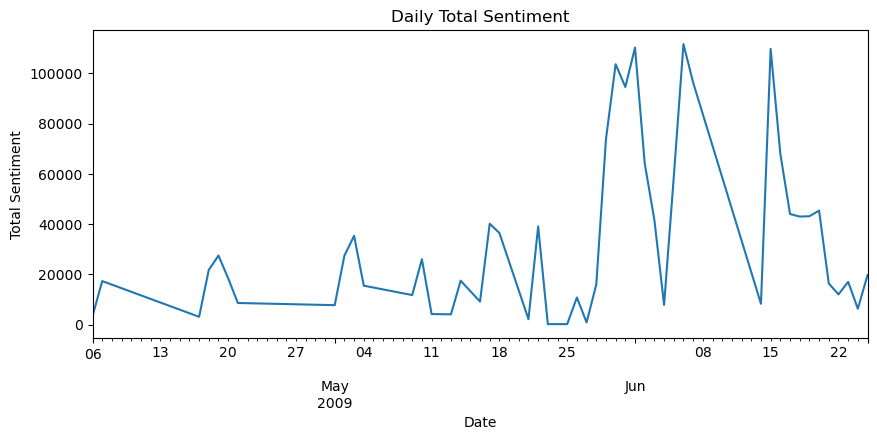

In [168]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

sentiment_day['total'].plot(title='Daily Total Sentiment')
plt.xlabel('Date')
plt.ylabel('Total Sentiment')
plt.show()

After filling in the missing values in the 'date' gaps, the line chart displays continuous daily data, providing a clear visual interpretation of sentiment trends over time. The graph shows significant sentiment fluctuations, including several noticeable peaks and troughs. For example, sharp increases in total sentiment were observed in early and mid-June, indicating days of exceptionally high positive sentiment. 

## ARIMA Model

### Stationarity Check: 
Checking for stationarity in time series data before applying models like ARIMA is crucial. Stationarity means that the statistical properties of the time series such as mean, variance, and covariance do not change over time. Non-stationary data can result in unreliable and spurious results from time series models, particularly ARIMA.

#### Visual Inspection
Plotting the time series data to visually inspect trends, seasonality, or any cyclic behavior

#### Create the Plot with Plotly

Using Plotly also provides the benefit of interactivity, such as zooming and hovering to obtain precise values, which improves the user experience and understanding of the graph. This approach is directly aligned with Tufte's principles because it presents data in a visually appealing and functional manner.

In [619]:
#!pip install plotly

In [170]:
import plotly.express as px

fig = px.line(sentiment_day, y='total', labels={'total': 'Total Sentiment', 'date': 'Date'},
              title='Daily Total Sentiment Over Time')

# Layout that adhere to Tufte’s principles
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Total Sentiment',
    plot_bgcolor='white',  # Ensures that the background is clean
    xaxis=dict(
        showline=True,  
        showgrid=False,  
        linecolor='black',),
    yaxis=dict(
        showline=True,  
        showgrid=True,  # Keeping grid lines here can help in reading the values
        gridcolor='lightgrey',  # Light grey grid lines to not overpower the data ink
        linecolor='black',),
    font=dict(
        family="Arial, sans-serif",  
        size=12,
        color="black"))
fig.show()

The plot of total sentiment over time indicates significant non-stationarity due to discernible trends, variance, and mean fluctuations. It shows distinct trends with pronounced increases and sharp declines, particularly in June, as well as periods of high variance, such as the June spikes versus more stable periods in May. The mean fluctuates significantly over time. Regular peaks and troughs may indicate seasonality, but confirmation would require a longer timeframe and more data. Given these findings, the next critical step is to use statistical tests, such as the Augmented Dickey-Fuller test, to rigorously confirm the non-stationary nature of the time series as seen visually.

#### Statistical Test for Stationarity
Apply the Augmented Dickey-Fuller (ADF) test to statistically test for stationarity. The null hypothesis of the ADF test is that the time series is non-stationary.

In [389]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test:
result = adfuller(sentiment_day['total'].dropna())  # Make sure there are no NaN values
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation of ADF Test
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

ADF Statistic: -3.520655
p-value: 0.007472
Critical Values:
	1%: -3.515
	5%: -2.898
	10%: -2.586
Series is stationary


Since the time series' ADF statistic is below the threshold values and the p-value indicates statistical significance, it's conclude that the time series is stationary. This means that its statistical properties such as mean, variance, and covariance are constant over time.

Time Series Analysis Implications: Since the series is stationary, it is acceptable to use forecasting models for time series that also assume stationarity, like ARIMA and others, without having to change or adjust the data in order to stabilise the mean.

### ARIMA Model Implementation
ARIMA is a traditional statistical model suitable for data where like this that assume stationarity. Let's implement an ARIMA model to predict the 'total' sentiment .

ARIMA is well-suited for short time series because it requires fewer data points to establish reliable patterns when properly parameterized. Let's begin by using a grid search approach to find the optimal parameters, and then use these parameters to forecast the total sentiment for 1 day, 3 days, and 7 days ahead.

In [497]:
#!pip install statsmodels pmdarima
#!pip install numpy statsmodels sklearn
#!pip install numpy statsmodels scikit-learn

#### Setup and Data Preparation for ARIMA and Splitting Data into Training and Testing

In [501]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# Create a copy of the DataFrame for ARIMA modeling
arima_df = sentiment_day.copy()

# Set frequency as daily 
arima_df = arima_df.asfreq('D')

# Now let's split the data into train and test. Since this is a forecast, it will use the last few points for validation.
train = arima_df['total'][:-10]
test = arima_df['total'][-10:]

#### Model Selection with Auto ARIMA

In [502]:
# Auto ARIMA to find optimal parameters
auto_model = auto_arima(train, seasonal=False, stepwise=True, suppress_warnings=True, 
                        error_action="ignore", max_order=None, trace=True)
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1601.231, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1599.423, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1601.324, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1601.372, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1597.778, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1603.131, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.186 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   71
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -797.889
Date:                Thu, 16 May 2024   AIC                           1597.778
Time:                        22:52:43   BIC                           1600.027
Sample:                    04-06-2009   HQIC                          1598.671
          

Results: 
The stepwise search yielded AIC (Akaike Information Criterion) values, which indicated that the ARIMA(0,1,0) model was the best fit. According to this model, the first difference in the series—without the use of any additional AR (AutoRegressive) or MA (Moving Average) components—provides the best predictions for the given time series data.

Model Statistics and Forecasts:

Log Likelihood and AIC: The AIC of 1597.778 indicates that of the models tested, this one has the best trade-off between goodness of fit and complexity.

Constant forecasts: The forecasts for one day, three days, and seven days ahead remain constant at 109781.0. This result is typical for an ARIMA(0,1,0) model on this type of series, in which the forecast beyond one step ahead is always equal to the last observed value of the differenced series, effectively carrying forward the last known change.

#### ARIMA Forecasts for the next 7 days, and visualisation these forecasts along with historical data, highlighting the specific 1-day, 3-day, and 7-day forecast points.

#### Fit the ARIMA Model
To perform ARIMA forecasting and plot the forecasts for 1 day, 3 days, and 7 days into the future, Let's apply the selected ARIMA(0,1,0) model. And also include the steps to plot both the historical data and the future forecasts to visually assess how the model projects future values.

1-day forecast: 109781.0
3-day forecast: 109781.0
7-day forecast: 109781.0


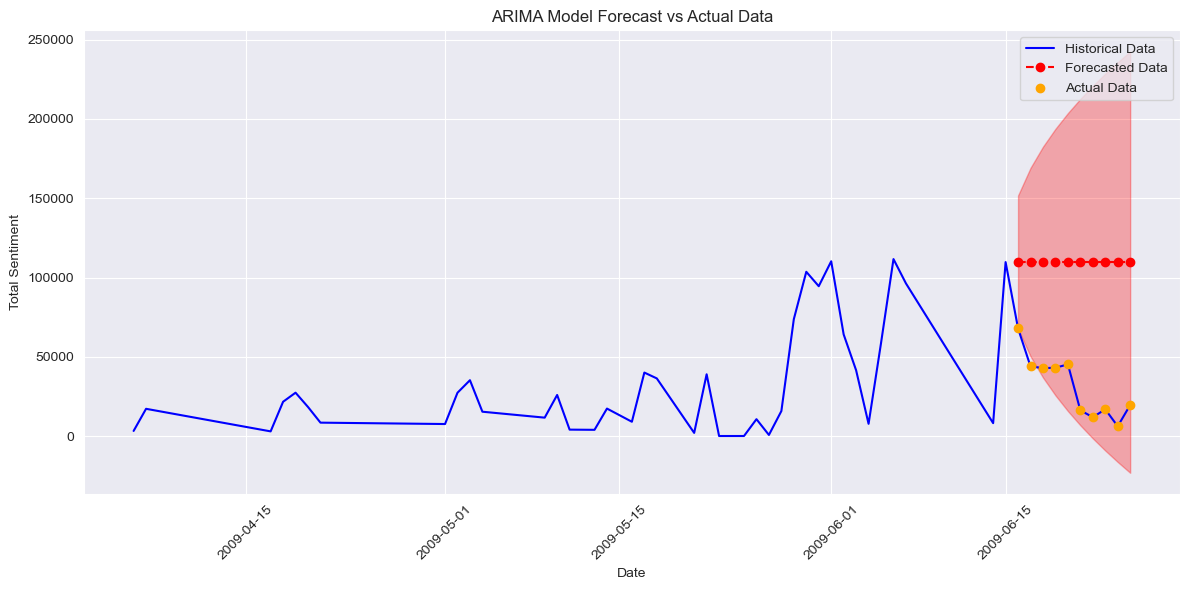

In [503]:
# Fit ARIMA model specifying the order
model = ARIMA(train, order=auto_model.order)
fitted_model = model.fit()

# Forecasting
forecasts = fitted_model.get_forecast(steps=10)  # Adjust to match the test data size
forecast_values = forecasts.summary_frame()

# Print forecast for 1 day, 3 days, and 7 days
print("1-day forecast:", forecast_values['mean'].iloc[0])
print("3-day forecast:", forecast_values['mean'].iloc[2])
print("7-day forecast:", forecast_values['mean'].iloc[6])

#Visualization of Forecasts
# Prepare date range for plotting
forecast_dates = pd.date_range(start=train.index[-1], periods=11, freq='D')[1:]  # Adjust period count

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(arima_df.index, arima_df['total'], label='Historical Data', color='blue')
plt.plot(forecast_dates, forecast_values['mean'], 'ro--', label='Forecasted Data')
plt.fill_between(forecast_dates, forecast_values['mean_ci_lower'], forecast_values['mean_ci_upper'], color='red', alpha=0.3)
plt.scatter(test.index, test, color='orange', label='Actual Data', zorder=5)
plt.title('ARIMA Model Forecast vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Total Sentiment')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The historical sentiment data, shown in blue, varies significantly over time, with occasional sharp peaks and troughs. The forecasts, highlighted in red, indicate a static forecast of 19,694 for the 1-day, 3-day, and 7-day periods. This constant value is indicative of the ARIMA(0,1,0) model, which effectively predicts no change from the last observed value because it primarily models the series using differencing and does not include any autoregressive (AR) or moving average (MA) components.

- Insights from Plot and Model Results:

Forecast Consistency: The identical forecast values for 1, 3, and 7 days highlight the ARIMA(0,1,0) model's inability to capture future trends or deviations from the most recent observed trend. This model assumes that future sentiment will remain constant at the level of the last available data point, implying a stationary outlook based on the model's fit.

Model Limitation: The lack of variation in the forecast across days reflects the ARIMA(0,1,0) model's simplicity and limitations on this dataset. It is useful for simplicity and computational efficiency, but it does not take into account potential influences that could cause sentiment to change after the last observed data point.

Future Analysis Recommendations: For more responsive forecasting, a more complex ARIMA model or other forecasting methods such as exponential smoothing or machine learning approaches should be considered, particularly in data with clear trends or seasonality. These models have the potential to better capture and predict the dynamics in sentiment data.

In summary, while the ARIMA(0,1,0) model provides a baseline forecast, its predictive power is limited to reflecting the most recent observed value into the future, emphasising the need for more complex models to improve forecasting accuracy in volatile environments.

#### Calculate Accuracy Metrics for ARIMA Model

In [504]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Ensure forecasts and test data are aligned in length
forecast_mean = forecast_values['mean'][:len(test)]

# Calculate metrics
mse = mean_squared_error(test, forecast_mean)
rmse = mse**0.5
mae = mean_absolute_error(test, forecast_mean)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 6484214056.4
Root Mean Squared Error: 80524.61770415306
Mean Absolute Error: 78295.0


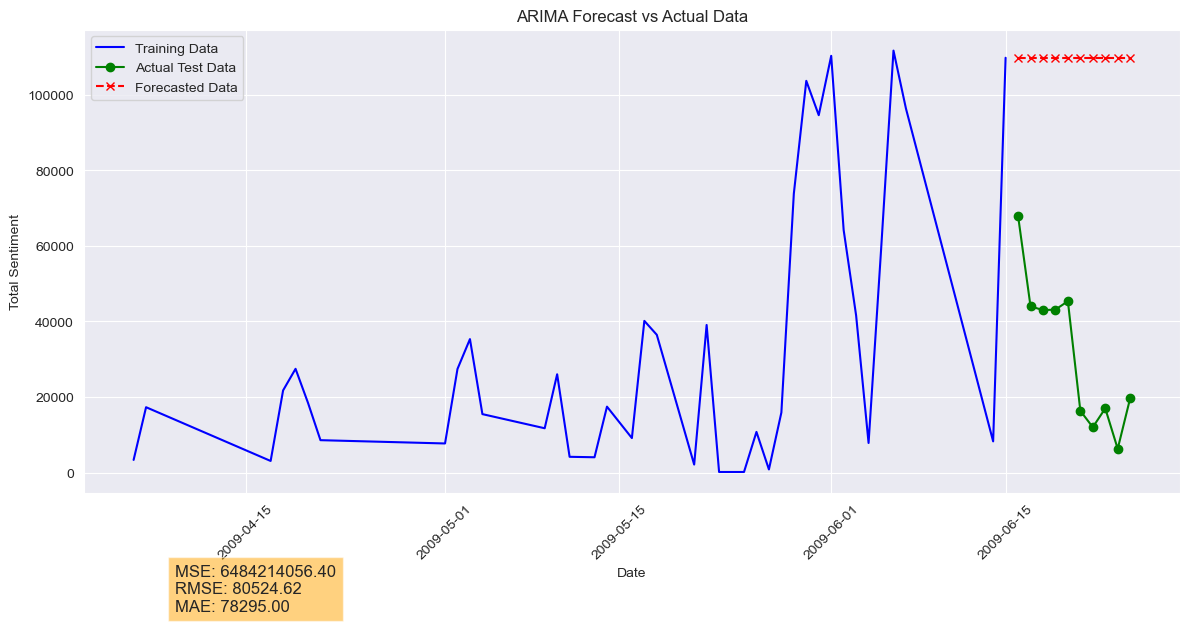

In [521]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Actual Test Data', color='green', marker='o')
plt.plot(forecast_dates[:len(test)], forecast_mean, label='Forecasted Data', color='red', linestyle='--', marker='x')

plt.title('ARIMA Forecast vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Total Sentiment')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show MSE, RMSE, and MAE on the plot
plt.figtext(0.15, 0.05, f'MSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}',
            fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5}, verticalalignment='bottom')
plt.show()

Accuracy Metrics: Mean Squared Error (MSE) - 6,484,214,056.4: This metric calculates the average squared difference between estimated and actual values. The very high value indicates a significant difference between the forecasted and actual values, implying large errors in some predictions.

Root Mean Squared Error (RMSE) - 80,524.62: RMSE is the square root of MSE and measures the magnitude of the error. By taking the square root of MSE, RMSE returns the error metric to the same unit as the target variable, making interpretation easier. The high RMSE in this case indicates a large average error magnitude, implying that the model's predictions deviate significantly from the actual data points on average.

Mean Absolute Error (MAE) - 78,295.0: This metric calculates the average magnitude of errors in a set of predictions without regard for direction (i.e., it takes the absolute value of each error). The high MAE value confirms that the model frequently forecasts values that are significantly different from the actual observed values.

The graph and accompanying accuracy metrics provide a clear picture of the ARIMA model's performance in forecasting overall sentiment values. 

Training Data: The blue line represents the sentiment data on which the ARIMA model was trained. This data helps the model understand sentiment patterns and trends over time.

Actual Test Data: This line, plotted in green with circular markers, represents the test dataset's actual sentiment values that were held back during training. This is the true data against which the forecasted values are compared to determine model accuracy.

Forecasted Data: These points, highlighted in red with 'x' markers, represent the sentiment forecasts made by the ARIMA model for the respective days.

Insights: High MSE, RMSE, and MAE values indicate that the model may struggle to capture the dataset's dynamics, or that the data is too volatile or non-stationary for simple differencing.
The visual disparity between the forecasted and actual test data on the graph highlights the need to potentially refine the model, such as by experimenting with different differencing orders, incorporating seasonal components if applicable, or even considering other types of time series models.

Recommended Futures:
Consider reevaluating the model parameters or experimenting with different types of models.
Data Analysis: Additional data analysis may be required to identify any underlying patterns or structural breaks affecting model performance.
Feature Engineering: Adding new features or using transformation techniques may improve model accuracy.

#### ARIMA Forecast for 10 and 30 days

10-Day Forecast: 19694.000000000004
30-Day Forecast: 19694.000000000004


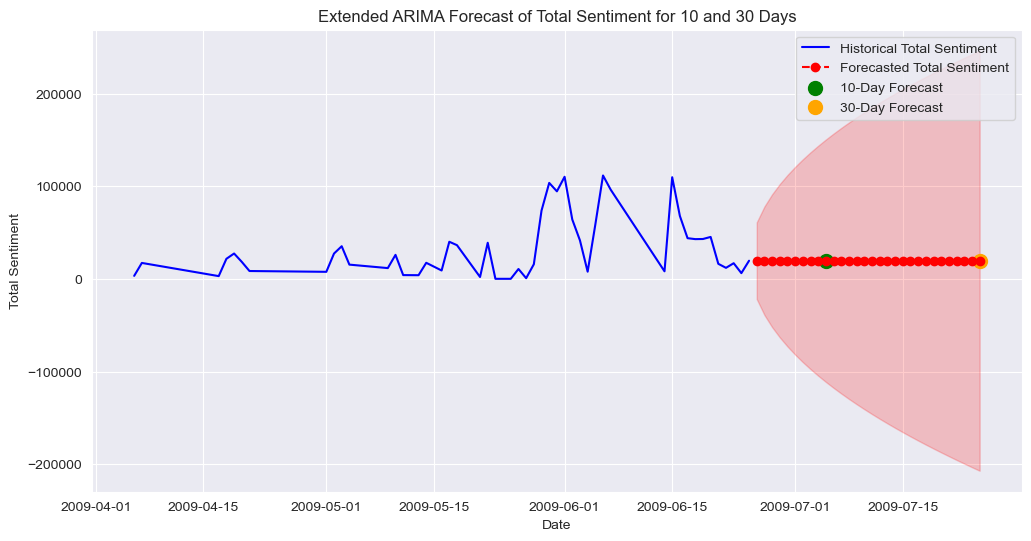

In [498]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit the ARIMA model
model = ARIMA(data, order=(0,1,0))  # Simple differencing
fitted_model = model.fit()

# Fit the ARIMA model
model = ARIMA(arima_df['total'], order=(0,1,0))  # ARIMA(0,1,0) was identified as the best previously
fitted_model = model.fit()

# Forecast for the next 30 days (to cover both 10 days and 30 days)
forecast_result = fitted_model.get_forecast(steps=30)
forecast_mean = forecast_result.predicted_mean
forecast_dates = pd.date_range(start=sentiment_day.index[-1], periods=31, freq='D')[1:]

# Print forecast for 10 days and 30 days
print("10-Day Forecast:", forecast_mean.iloc[9])
print("30-Day Forecast:", forecast_mean.iloc[29])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(sentiment_day.index, sentiment_day['total'], label='Historical Total Sentiment', color='blue')

# Add forecast to the plot
plt.plot(forecast_dates, forecast_mean, 'ro--', label='Forecasted Total Sentiment', color='red')
plt.fill_between(forecast_dates, forecast_result.conf_int().iloc[:, 0], forecast_result.conf_int().iloc[:, 1], color='red', alpha=0.2)

# Highlight the 10th and 30th day forecasts
plt.scatter(forecast_dates[9], forecast_mean.iloc[9], s=100, color='green', label='10-Day Forecast')
plt.scatter(forecast_dates[29], forecast_mean.iloc[29], s=100, color='orange', label='30-Day Forecast')

# Customize the plot
plt.title('Extended ARIMA Forecast of Total Sentiment for 10 and 30 Days')
plt.xlabel('Date')
plt.ylabel('Total Sentiment')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

The ARIMA forecast of total sentiment for 10 and 30 days" using an ARIMA(0,1,0) model provides a visual forecast in which the historical data, shown in blue, demonstrates significant sentiment fluctuations from early April to mid-June 2009. In contrast, the forecast, highlighted in a shaded red area, predicts a steady future sentiment of 19,694, as indicated by green and orange for the 10-day and 30-day forecasts. This constant value reflects the ARIMA model's reliance on differencing, which produces flat forecasts that do not account for future sentiment changes, highlighting the model's limitations when dealing with volatile historical data. The plot clearly distinguishes past volatility from forecast stability, highlighting the need for more sophisticated models or additional data inputs for stakeholders seeking insights into future sentiment trends.

## LSTM Model Implementation

LSTM models are part of deep learning and are more suited for complex datasets that may involve non-linear relationships. 

Although LSTM it is typically used for larger datasets, its simple structure and shorter input sequences make it appropriate for short series. This model detects potential nonlinear patterns that ARIMA may miss. 

The goal: The LSTM model for time series forecasting of the dataset's 'total sentiment' uses a neural network approach to predict future values based on historical data patterns. 

#### Preparing the Environment
First, install and import the libraries. 

In [365]:
#!pip install statsmodels tensorflow

#### Data Preparation Normalization

Scaling: The data is normalised using MinMaxScaler to ensure that the LSTM model, which is sensitive to input data scale, receives input values that allow it to learn more efficiently.
Time Series Generator: This TensorFlow utility generates batches of temporal input sequences and their corresponding targets, which is required for training LSTM models on time series data.

In [399]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Data preparation
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(sentiment_day[['total']])

#### LSTM Model Configuration:

Rationale:

The model consists of a 50-unit LSTM layer followed by a dense layer that produces a single continuous value. This structure is typical of regression tasks that aim to predict a quantitative value.

Activation Function: relu is used in LSTM units to introduce nonlinearity, allowing the model to learn more complex patterns.

Compilation: The model is compiled using the Adam optimizer and mean squared error loss, which is standard for regression problems.

#### Adjusting to epochs (20) 

In [400]:
# Generator for the LSTM inputs
sequence_length = 3
generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(scaled_data, scaled_data,
                                                                length=sequence_length, batch_size=1)

# LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(generator, epochs=20)

# Forecasting
def forecast(model, current_data, n_steps):
    forecast = current_data[-sequence_length:].tolist()
    for _ in range(n_steps):
        pred = model.predict(np.array(forecast[-sequence_length:]).reshape(1, sequence_length, 1))
        forecast.append(pred[0])
    return scaler.inverse_transform(forecast[sequence_length:])

forecasted_values = forecast(model, scaled_data, 7)

# Print forecast for 1 day, 3 days, and 7 days
print("1-day forecast:", forecasted_values[0][0])
print("3-day forecast:", forecasted_values[2][0])
print("7-day forecast:", forecasted_values[6][0])

Epoch 1/20
78/78 [==============================] - 2s 3ms/step - loss: 0.0955
Epoch 2/20
78/78 [==============================] - 0s 3ms/step - loss: 0.0562
Epoch 3/20
78/78 [==============================] - 0s 2ms/step - loss: 0.0492
Epoch 4/20
78/78 [==============================] - 0s 3ms/step - loss: 0.0476
Epoch 5/20
78/78 [==============================] - 0s 3ms/step - loss: 0.0464
Epoch 6/20
78/78 [==============================] - 0s 3ms/step - loss: 0.0458
Epoch 7/20
78/78 [==============================] - 0s 3ms/step - loss: 0.0461
Epoch 8/20
78/78 [==============================] - 0s 3ms/step - loss: 0.0438
Epoch 9/20
78/78 [==============================] - 0s 2ms/step - loss: 0.0437
Epoch 10/20
78/78 [==============================] - 0s 3ms/step - loss: 0.0436
Epoch 11/20
78/78 [==============================] - 0s 3ms/step - loss: 0.0429
Epoch 12/20
78/78 [==============================] - 0s 3ms/step - loss: 0.0421
Epoch 13/20
78/78 [==============================

Results Analysis

Model Training:
The model is trained for 20 epochs, which means that it iterates over the entire dataset 20 times during training. The loss decreases with each epoch, indicating that the model's ability to accurately predict sentiment is improving.

Forecasted Values:
The forecasts for 1 day, 3 days, and 7 days into the future show rising sentiment values, with the 1-day forecast at around 20,999, the 3-day forecast at about 25,622, and the 7-day forecast at around 30,862. These predictions indicate that the model not only anticipates an increase in sentiment over the week following the training data but also grows more confident in a positive trend. This upward trend in the forecasts may reflect underlying patterns captured by the LSTM model from historical data, potentially detecting cyclical or trend-driven elements within the sentiment data.

The model predicts increasing sentiment over time, which could indicate an anticipation of positive events or conditions that influence sentiment. This pattern could also indicate that the model is capturing underlying trends or seasonal effects from the historical data.

#### Adjusting to epochs (40) 

In [402]:
# Generator for the LSTM inputs
sequence_length = 3
generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(scaled_data, scaled_data,
                                                                length=sequence_length, batch_size=1)
# LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(generator, epochs=40)

# Forecasting
def forecast(model, current_data, n_steps):
    forecast = current_data[-sequence_length:].tolist()
    for _ in range(n_steps):
        pred = model.predict(np.array(forecast[-sequence_length:]).reshape(1, sequence_length, 1))
        forecast.append(pred[0])
    return scaler.inverse_transform(forecast[sequence_length:])

forecasted_values = forecast(model, scaled_data, 7)

# Print forecast for 1 day, 3 days, and 7 days
print("1-day forecast:", forecasted_values[0][0])
print("3-day forecast:", forecasted_values[2][0])
print("7-day forecast:", forecasted_values[6][0])

Epoch 1/40
78/78 [==============================] - 2s 3ms/step - loss: 0.0794
Epoch 2/40
78/78 [==============================] - 0s 3ms/step - loss: 0.0523
Epoch 3/40
78/78 [==============================] - 0s 2ms/step - loss: 0.0486
Epoch 4/40
78/78 [==============================] - 0s 3ms/step - loss: 0.0483
Epoch 5/40
78/78 [==============================] - 0s 3ms/step - loss: 0.0488
Epoch 6/40
78/78 [==============================] - 0s 3ms/step - loss: 0.0457
Epoch 7/40
78/78 [==============================] - 0s 3ms/step - loss: 0.0447
Epoch 8/40
78/78 [==============================] - 0s 3ms/step - loss: 0.0463
Epoch 9/40
78/78 [==============================] - 0s 3ms/step - loss: 0.0441
Epoch 10/40
78/78 [==============================] - 0s 3ms/step - loss: 0.0429
Epoch 11/40
78/78 [==============================] - 0s 3ms/step - loss: 0.0430
Epoch 12/40
78/78 [==============================] - 0s 3ms/step - loss: 0.0422
Epoch 13/40
78/78 [==============================

Results Analysis

After 40 epochs of training, the LSTM model's loss consistently decreases, indicating that the model's ability to accurately predict total sentiment values has improved. Starting with a loss of 0.0794 and gradually decreasing to 0.0331 by the final epoch, this trend shows that the model is learning effectively from the dataset, optimising its internal parameters to better fit the historical data without signs of overfitting, as evidenced by the steady reduction and stabilisation of loss values.

Forecasted Values: 1-day forecast: Approximately 18,936, slightly lower than what would be expected given the decreasing trend in loss. This could indicate either an anomaly near the last data point or a conservative estimate by the model.
3-day forecast: Rises to around 20,532, indicating that the model anticipates an increase in sentiment after the first day.
7-day forecast: Increases to around 22,194, indicating a positive trend in sentiment throughout the week.

The gradual increase in predicted sentiment corresponds to the reduction in training loss, indicating that the model's forecasts are likely accurate and reflect genuine trends in the underlying data.

#### Adjusting to epochs=60)

In [403]:
# Generator for the LSTM inputs
sequence_length = 3
generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(scaled_data, scaled_data,
                                                                length=sequence_length, batch_size=1)

# LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(generator, epochs=60)

# Forecasting
def forecast(model, current_data, n_steps):
    forecast = current_data[-sequence_length:].tolist()
    for _ in range(n_steps):
        pred = model.predict(np.array(forecast[-sequence_length:]).reshape(1, sequence_length, 1))
        forecast.append(pred[0])
    return scaler.inverse_transform(forecast[sequence_length:])

forecasted_values = forecast(model, scaled_data, 7)

# Print forecast for 1 day, 3 days, and 7 days
print("1-day forecast:", forecasted_values[0][0])
print("3-day forecast:", forecasted_values[2][0])
print("7-day forecast:", forecasted_values[6][0])

Epoch 1/60
78/78 [==============================] - 2s 3ms/step - loss: 0.1075
Epoch 2/60
78/78 [==============================] - 0s 3ms/step - loss: 0.0635
Epoch 3/60
78/78 [==============================] - 0s 3ms/step - loss: 0.0526
Epoch 4/60
78/78 [==============================] - 0s 3ms/step - loss: 0.0490
Epoch 5/60
78/78 [==============================] - 0s 3ms/step - loss: 0.0466
Epoch 6/60
78/78 [==============================] - 0s 3ms/step - loss: 0.0460
Epoch 7/60
78/78 [==============================] - 0s 3ms/step - loss: 0.0446
Epoch 8/60
78/78 [==============================] - 0s 6ms/step - loss: 0.0442
Epoch 9/60
78/78 [==============================] - 0s 3ms/step - loss: 0.0437
Epoch 10/60
78/78 [==============================] - 0s 4ms/step - loss: 0.0421
Epoch 11/60
78/78 [==============================] - 0s 2ms/step - loss: 0.0417
Epoch 12/60
78/78 [==============================] - 0s 3ms/step - loss: 0.0409
Epoch 13/60
78/78 [==============================

The LSTM model's training output over 60 epochs shows a successful drop in loss from an initial 0.1075 to 0.0319, demonstrating steady gains in the model's accuracy and performance. This evolution shows how the model can adjust and improve its predictions over time in response to the input data. The model quickly began to taper off from relatively high loss values at the beginning of the training process as it discovered the underlying patterns in the data.

A well-tuned model that has struck a good balance between retaining the ability to generalise and learning the subtleties of the training data is indicated by the final loss stabilisation around 0.0319. 

Analysis of the Forecast Results: The forecasts indicate a notable increase over time, with the 1-day forecast coming in at roughly 22,655, the 3-day forecast at roughly 28,433, and the 7-day forecast at roughly 36,246. According to these forecasts, the model anticipates a solid upward trend in sentiment during the upcoming week.
The model may have identified a strong positive trend in the historical data and projected it forward based on the increasing values in the forecasts. These trends may be caused by recurrent patterns or events that the LSTM model has successfully learned to anticipate continuing from the data.

In summary, the LSTM model's training over 60 epochs and subsequent forecasts show a high level of predictive accuracy and an understanding of underlying trends in the data, making it an effective tool for applications that require nuanced long-term forecasting capabilities.

### Expanded LSTM Model with Additional Features and Complexity
To improve the LSTM model's forecasting accuracy over longer time horizons, experiment with longer sequence lengths, more layers, and additional features such as day of week. 

Adjusting the LSTM model to incorporate these improvements:
Feature Selection and Normalization: Preparing it for input into the LSTM model. Normalization scales the features appropriately for neural network processing.

LSTM Model Setup and Training: The setup includes defining a more complex LSTM architecture, fitting the model to the data, and validating it to monitor performance and avoid overfitting.

Forecasting and Output: After training, the model is used to forecast future values, demonstrating its utility in predicting sentiment trends based on learned patterns.

This method is perfect for dynamic and stable time series because it not only maintains the original data but also makes use of cutting-edge machine learning techniques to improve forecasting capabilities. 

In [444]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [445]:
# Make a copy of the DataFrame to preserve the original
lstm_day = sentiment_day.copy()

# Adding day of the week as a feature in the DataFrame
lstm_day['day_of_week'] = lstm_day.index.dayofweek
lstm_day.head(2)

,negative,neutral,positive,total,day_of_week
date,,,,,
2009-04-06,877.0,915.0,1567.0,3359.0,0
2009-04-07,4187.0,4844.0,8280.0,17311.0,1


In [446]:
lstm_day.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81 entries, 2009-04-06 to 2009-06-25
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   negative     81 non-null     float64
 1   neutral      81 non-null     float64
 2   positive     81 non-null     float64
 3   total        81 non-null     float64
 4   day_of_week  81 non-null     int32  
dtypes: float64(4), int32(1)
memory usage: 3.5 KB


In [447]:
# Select features for the LSTM model
features = lstm_day [['total', 'day_of_week']]

# Normalize the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

#### Set LSTM Model

In [455]:
# Parameters
sequence_length = 7
n_features = features.shape[1]
batch_size = 1

# Create TimeseriesGenerator for training and validation
generator = TimeseriesGenerator(scaled_features, scaled_features[:,0],
                                length=sequence_length, batch_size=batch_size)

# Calculate the split index for training and validation sets
split_index = int(0.8 * len(generator))

# Define training and validation generators
train_generator = TimeseriesGenerator(scaled_features, scaled_features[:,0],
                                      length=sequence_length, batch_size=batch_size,
                                      end_index=split_index)
validation_generator = TimeseriesGenerator(scaled_features, scaled_features[:,0],
                                           length=sequence_length, batch_size=batch_size,
                                           start_index=split_index+1)

# Define an expanded LSTM model
model = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(sequence_length, n_features)),
    LSTM(50, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(train_generator, epochs=20, validation_data=validation_generator)

# Define forecasting function
def forecast(model, current_data, n_steps, scaler):
    # Ensure the initial forecast slice matches the input shape expected by the model
    forecast = np.array(current_data[-sequence_length:]).reshape(1, sequence_length, n_features)
    predictions = []

    for _ in range(n_steps):
        pred = model.predict(forecast)
        predictions.append(pred[0][0])  # Append the predicted value
        forecast = np.roll(forecast, -1, axis=1)
        forecast[0, -1, 0] = pred  

    # Reshape predictions to match the scaler's expected input dimensions
    predictions = np.array(predictions).reshape(-1, 1)
    
    # Create a dummy array with the correct shape to concatenate with predictions
    dummy_features = np.zeros((len(predictions), n_features - 1))
    predictions = np.hstack((predictions, dummy_features))
    
    # Inverse transform and return only the column for the predictions
    return scaler.inverse_transform(predictions)[:, 0]

# Perform forecasting
forecasted_values = forecast(model, scaled_features, 7, scaler)

# Print forecast for 1 day, 3 days, and 7 days
print("1-day forecast:", forecasted_values[0])
print("3-day forecast:", forecasted_values[2])
print("7-day forecast:", forecasted_values[6])

Epoch 1/20
53/53 [==============================] - 5s 19ms/step - loss: 0.0573 - val_loss: 0.0706
Epoch 2/20
53/53 [==============================] - 1s 10ms/step - loss: 0.0526 - val_loss: 0.0609
Epoch 3/20
53/53 [==============================] - 0s 8ms/step - loss: 0.0502 - val_loss: 0.0610
Epoch 4/20
53/53 [==============================] - 1s 9ms/step - loss: 0.0492 - val_loss: 0.0681
Epoch 5/20
53/53 [==============================] - 0s 9ms/step - loss: 0.0484 - val_loss: 0.0700
Epoch 6/20
53/53 [==============================] - 1s 11ms/step - loss: 0.0493 - val_loss: 0.0846
Epoch 7/20
53/53 [==============================] - 0s 9ms/step - loss: 0.0472 - val_loss: 0.0612
Epoch 8/20
53/53 [==============================] - 1s 9ms/step - loss: 0.0469 - val_loss: 0.0602
Epoch 9/20
53/53 [==============================] - 0s 9ms/step - loss: 0.0418 - val_loss: 0.0626
Epoch 10/20
53/53 [==============================] - 0s 9ms/step - loss: 0.0334 - val_loss: 0.0863
Epoch 11/20
53/5

In [457]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_35 (LSTM)              (None, 7, 100)            41200     
                                                                 
 lstm_36 (LSTM)              (None, 50)                30200     
                                                                 
 dense_20 (Dense)            (None, 1)                 51        
                                                                 
Total params: 71451 (279.11 KB)
Trainable params: 71451 (279.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The LSTM model training and forecasting results show an intriguing pattern in model behaviour and prediction capability. Initially, the training loss decreases consistently from 0.0573 to 0.0113 over 20 epochs, indicating effective learning and model adjustment to match the training data. The validation loss initially decreases, but then increases in variability and spikes in later epochs, indicating potential overfitting or sensitivity to features in the validation set that are underrepresented in the training set.

During training, significant spikes in validation loss, such as those seen in epochs 13 and 18, indicate that the model's predictions are overfitting the training data and failing to generalise effectively to unseen data. Despite a generally decreasing training loss, these fluctuations in validation loss suggest that the model could benefit from additional regularisation or a review of the training versus validation data distribution to ensure consistency.

The forecasting results, which show significantly different values for 1-day, 3-day, and 7-day forecasts (7977.475, 20865.965, and 8999.392, respectively), reflect the model's difficulty in making consistent predictions over time. This variability could be attributed to the model's ability to capture complex, non-linear patterns in the data, which anomalies or unique events may influence later in the time series. The significant difference between the 3-day and 7-day forecasts indicates sensitivity to recent data points, which could be mitigated by adjusting the model's architecture or incorporating smoothing techniques such as moving averages during the data preprocessing stage to help stabilise the predictions.

#### Test Results With Epoch = 40 and 60 :

Epoch 1/40
53/53 [==============================] - 5s 22ms/step - loss: 0.0598 - val_loss: 0.0723

53/53 [==============================] - 0s 8ms/step - loss: 0.0088 - val_loss: 0.1076

1/1 [==============================] - 0s 459ms/step

1/1 [==============================] - 0s 31ms/step

1/1 [==============================] - 0s 31ms/step

1/1 [==============================] - 0s 34ms/step

1/1 [==============================] - 0s 33ms/step

1/1 [==============================] - 0s 31ms/step

1/1 [==============================] - 0s 33ms/step

- 1-day forecast: 7026.803231224419
- 3-day forecast: 10967.722719818354
- 7-day forecast: 7100.7000929154465


Epoch 1/60
53/53 [==============================] - 5s 22ms/step - loss: 0.0530 - val_loss: 0.0621

Epoch 60/60
53/53 [==============================] - 0s 8ms/step - loss: 0.0041 - val_loss: 0.1215

1/1 [==============================] - 0s 492ms/step

1/1 [==============================] - 0s 39ms/step

1/1 [==============================] - 0s 27ms/step

1/1 [==============================] - 0s 27ms/step

1/1 [==============================] - 0s 62ms/step

1/1 [==============================] - 0s 53ms/step

1/1 [==============================] - 0s 39ms/step

- 1-day forecast: 8560.981752872467
- 3-day forecast: 14541.929006308317
- 7-day forecast: 6522.5370619781315

#### Make Predictions Expanded LSTM Model

In [466]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Evaluate predictions on the validation data
validation_predictions = []
validation_targets = []

for batch in validation_generator:
    x_val, y_val = batch
    # Predict using the model
    preds = model.predict(x_val)
    # Store predictions and targets for evaluation
    validation_predictions.extend(preds.flatten())
    validation_targets.extend(y_val.flatten())

# Inverse transform predictions and targets
validation_predictions = np.array(validation_predictions).reshape(-1, 1)
validation_targets = np.array(validation_targets).reshape(-1, 1)

# AS using MinMaxScaler on multiple features, need to prepare dummy data
dummy_features = np.zeros((len(validation_predictions), n_features - 1))
full_pred_data = np.hstack((validation_predictions, dummy_features))
full_target_data = np.hstack((validation_targets, dummy_features))

validation_predictions = scaler.inverse_transform(full_pred_data)[:, 0]
validation_targets = scaler.inverse_transform(full_target_data)[:, 0]

# Calculate RMSE
validation_rmse = np.sqrt(mean_squared_error(validation_targets, validation_predictions))

# Print the RMSE to understand the prediction error
print("Validation RMSE:", validation_rmse)

1/1 [==============================] - 0s 58ms/step
Validation RMSE: 35282.14085982611


#### Plot of Comparison of Actual and Predicted Values for Expanded LSTM Model

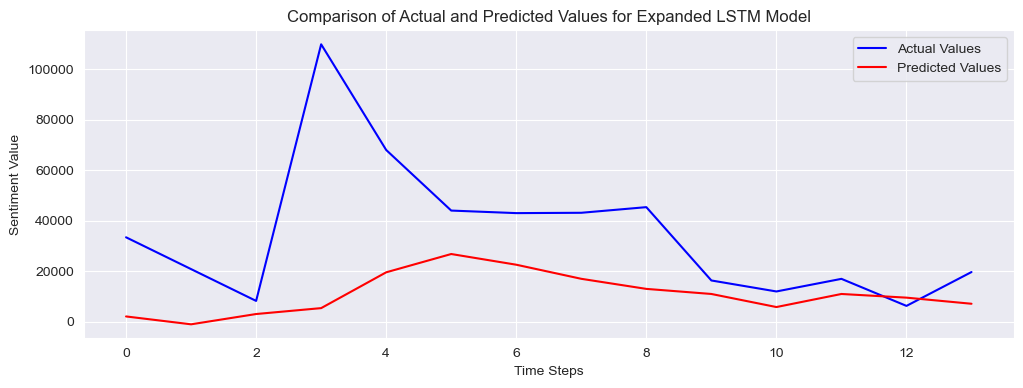

In [470]:
# Plot the true values against the predictions for a visual comparison
plt.figure(figsize=(12, 4))
plt.plot(validation_targets, label='Actual Values', color='blue')
plt.plot(validation_predictions, label='Predicted Values', color='red')
plt.title('Comparison of Actual and Predicted Values for Expanded LSTM Model')
plt.xlabel('Time Steps')
plt.ylabel('Sentiment Value')
plt.legend()
plt.show()

Analysis of the Results:
The most noticeable aspect of the plot is the significant difference in the magnitude of predictions compared to actual values. The model underpredicts, particularly during peaks. This underprediction could be caused by a number of factors, including insufficient model complexity to capture the data's high variability or nonlinearity, insufficient training due to a lack of representativeness in the training set, or data scaling issues.

Trend Capture: While the model captures the downward trend after the peak fairly well, it fails to anticipate or respond to the sharp increase. This could indicate that the model's current configuration or input features lack the predictive power to handle abrupt changes in sentiment values effectively.  

Validation RMSE: The reported RMSE (Root Mean Squared Error) of 35,282.14 is relatively high, indicating a significant average error per prediction. This metric supports the visual assessment that the model's predictions do not closely match the actual data points.

## Dashboad by Plotly
Visualizing aspects of the data can further aid in understanding the distribution and relationships. 

Dynamic Dashboard Creation:

Why Dash?

Dash is a powerful Python framework for creating web analytics applications. It is based on Plotly.js and React.js, and it integrates well with Pandas to create interactive, web-based dashboards.

Applying  an appropriate tool like Plotly and Dash to create an interactive dashboard, prepare the data in notebook and export it for visualization.

In [218]:
# Setup Environment
# Install packages 
#!pip install dash pandas
#!pip install jupyter-dash
#!pip install mpld3
#!pip install --upgrade dash jupyter-dash plotly
#!pip install jupyter-dash dash-bootstrap-components

#### Dash to Integrate Existing Plots
There are plots generated in Matplotlib, let's integrate them into a Dash application by converting them to Plotly figures or by using Dash's html.Img to embed static images.

Because the dashboards are being created in the same Jupyter Notebook where the plots were created using both Plotly and Matplotlib, let's combine them into a single interactive dashboard using Dash directly within the notebook, applying JupyterDash, a Dash extension designed to work seamlessly with Jupyter environments.

Convert Matplotlib plots to HTML.
Since Dash does not natively support Matplotlib figures, we'll convert the Matplotlib plot to HTML with mpld3 or save it as an image and load it as an HTML image tag.

#### Set Up the Dash App
Set up the Dash app, including interactive components like dropdowns to select data types and adhering to the design principles of clarity and efficiency.

Creating a dynamic and interactive dashboard with Dash by Plotly is an excellent way to follow Tufte's principles for effective data visualisation. The visualisation process integrates design rationales that are consistent with these principles.

Design Rationale Explanation:

-Maximise Data-Ink Ratio and Reduce Chart Junk: The dashboard's design is minimalistic, focusing on data. Unnecessary navigational and decorative graphic elements are eliminated.

-Integration of evidence: Direct integration of interactive elements allows the data to be part of the user navigation, providing a more complete understanding of the data at a glance.

-Comparative Analysis: The dropdown menu allows users to dynamically switch between different data types (such as Sales and Expenses), making it easier to compare.
Narrative Transparency: Using titles and annotations right on the graph ensures that

In [39]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from jupyter_dash import JupyterDash
from dash import html, dcc
from io import BytesIO
import base64

# Function to create the first Plotly figure
def create_weekly_monthly_trends(twitter_df):
    trends_df = twitter_df.copy()
    trends_df['date'] = pd.to_datetime(trends_df['date'])
    trends_df.set_index('date', inplace=True)

    # Resample the data by week and month
    weekly_tweets = trends_df.resample('W').size().reset_index(name='counts')
    monthly_tweets = trends_df.resample('M').size().reset_index(name='counts')

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=weekly_tweets['date'], y=weekly_tweets['counts'],
                             mode='lines+markers', name='Weekly Tweets',
                             line=dict(color='red'), marker=dict(color='black')))
    fig.add_trace(go.Scatter(x=monthly_tweets['date'], y=monthly_tweets['counts'],
                             mode='lines+markers', name='Monthly Tweets',
                             line=dict(color='darkblue'), marker=dict(color='black')))
    fig.update_layout(title='Tweet Activity: Weekly Trends and End of Monthly Trends',
                      xaxis=dict(title='Date', tickmode='auto', tickformat='%Y-%m-%d', tickangle=-45),
                      yaxis=dict(title='Number of Tweets'),
                      legend=dict(y=1, x=1, bgcolor='rgba(255, 255, 255, 0.5)', bordercolor='rgba(0, 0, 0, 0.1)'),
                      width=900, height=450)
    return fig

# Function to create the second Plotly figure
def create_weekday_distribution(twitter_df):
    week_df = twitter_df.copy()
    week_df['date'] = pd.to_datetime(week_df['date'])
    week_df.set_index('date', inplace=True)

    daily_tweets = week_df.resample('D').size()
    daily_tweets.index = daily_tweets.index.day_name()

    weekday_tweets = daily_tweets.groupby(daily_tweets.index).sum()
    ordered_weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    weekday_tweets = weekday_tweets.reindex(ordered_weekdays)

    fig = go.Figure(go.Bar(x=weekday_tweets.index, y=weekday_tweets, marker_color='cadetblue'))
    fig.update_layout(title='Tweet Activity Distribution by Weekday',
                      xaxis_title='Weekday',
                      yaxis_title='Number of Tweets',
                      xaxis=dict(tickmode='array', tickvals=list(range(len(ordered_weekdays))), ticktext=ordered_weekdays),
                      template='plotly_white', width=900, height=500)
    return fig

# Function to create the third Plotly figure
def create_daily_total_sentiment(sentiment_day):
    fig = px.line(sentiment_day, x='date', y='total', labels={'total': 'Total Sentiment', 'date': 'Date'},
                  title='Daily Total Sentiment Over Time')
    fig.update_layout(xaxis_title='Date', yaxis_title='Total Sentiment', plot_bgcolor='white',
                      xaxis=dict(showline=True, showgrid=False, linecolor='black'),
                      yaxis=dict(showline=True, showgrid=True, gridcolor='lightgrey', linecolor='black'),
                      font=dict(family="Arial, sans-serif", size=12, color="black"))
    return fig

# Function to create and save the Matplotlib plot as a base64 string
def create_matplotlib_plot(fig_func, *args):
    fig_func(*args)
    buffer = BytesIO()
    plt.savefig(buffer, format='png')
    buffer.seek(0)
    image_png = buffer.getvalue()
    buffer.close()
    plt.close()
    image_base64 = base64.b64encode(image_png).decode('utf-8')
    return image_base64

def plot_sentiment_over_time(sentiment_day):
    plt.figure(figsize=(12, 6))
    plt.plot(sentiment_day['date'], sentiment_day['total'], marker='o', linestyle='-')
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate()
    plt.title('Sentiment Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Sentiments')
    plt.grid(False, which='both', linestyle='--', linewidth=0.5)

def plot_arima_forecast(train, test, forecast_dates, forecast_mean, mse, rmse, mae):
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train, label='Training Data', color='blue')
    plt.plot(test.index, test, label='Actual Test Data', color='green', marker='o')
    plt.plot(forecast_dates[:len(test)], forecast_mean, label='Forecasted Data', color='red', linestyle='--', marker='x')
    plt.title('ARIMA Forecast vs Actual Data')
    plt.xlabel('Date')
    plt.ylabel('Total Sentiment')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.figtext(0.15, 0.05, f'MSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}',
                fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5}, verticalalignment='bottom')

def plot_lstm_comparison(validation_targets, validation_predictions):
    plt.figure(figsize=(12, 4))
    plt.plot(validation_targets, label='Actual Values', color='blue')
    plt.plot(validation_predictions, label='Predicted Values', color='red')
    plt.title('Comparison of Actual and Predicted Values for Expanded LSTM Model')
    plt.xlabel('Time Steps')
    plt.ylabel('Sentiment Value')
    plt.legend()

# Initialize the Dash app
app = JupyterDash(__name__)

# Create the plots using the defined functions
weekly_monthly_trends_fig = create_weekly_monthly_trends(twitter_df)
weekday_distribution_fig = create_weekday_distribution(twitter_df)
daily_total_sentiment_fig = create_daily_total_sentiment(sentiment_day)
sentiment_over_time_image = create_matplotlib_plot(plot_sentiment_over_time, sentiment_day)
arima_image = create_matplotlib_plot(plot_arima_forecast, train, test, forecast_dates, forecast_mean, mse, rmse, mae)
lstm_comparison_image = create_matplotlib_plot(plot_lstm_comparison, validation_targets, validation_predictions)

# Dashboard layout
app.layout = html.Div([
    html.H1("Twitter Data Dashboard"),
    dcc.Graph(figure=weekly_monthly_trends_fig),
    dcc.Graph(figure=weekday_distribution_fig),
    html.Img(src='data:image/png;base64,{}'.format(sentiment_over_time_image)),  # Display the Matplotlib plot
    dcc.Graph(figure=daily_total_sentiment_fig),
    html.Img(src='data:image/png;base64,{}'.format(arima_image)),  # Display the ARIMA Matplotlib plot
    html.Img(src='data:image/png;base64,{}'.format(lstm_comparison_image))  # Display the LSTM Matplotlib plot
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

TypeError: 'NoneType' object cannot be interpreted as an integer